# Modelo ARIMA Co2

- Emissões de dióxido de carbono mensais/anuais da geração de eletricidade da Energy Information Administration. Os dados são divididos por tipo de combustível.

http://www.eia.gov/electricity/data.cfm#elecenv

**Índice**

1.Introdução

2.Conjunto de dados de série temporal

3.Importar bibliotecas

4.Recuperação e visualização de conjuntos de dados de séries temporais

- 5.Análise de emissão de CO2 de gás natural 5.1 Teste estacionário
- 5.1.1 Teste graficamente estacionário
- 5.1.2 Teste de estacionariedade usando o teste Dickey-Fuller
- 5.1.3 Transforme o conjunto de dados em estacionário

6.Encontre os parâmetros ideais e construa o modelo SARIMA

7.Validando a previsão

8.Previsão

9.Conclusão

# 1) Introdução

A série temporal é uma coleção de pontos de dados que são coletados em intervalos de tempo constantes. É um problema dinâmico ou dependente do tempo com ou sem tendência crescente ou decrescente, sazonalidade. A modelagem de séries temporais é um método poderoso para descrever e extrair informações de dados baseados em tempo e ajudar a tomar decisões informadas sobre resultados futuros.

Este notebook explora como recuperar conjuntos de dados de séries temporais csv, visualizando conjuntos de dados de séries temporais, como transformar conjuntos de dados em séries temporais, testando se a série temporal é estacionária ou não usando métodos estatísticos de teste gráficos e Dickey-Fuller, como transformar séries temporais em estacionárias , como encontrar os parâmetros ideais para construir o modelo de Média Móvel Integrada Autoregressiva sazonal (SARIMA) usando o método de pesquisa de grade, diagnosticar a previsão de séries temporais, validar a potência preditiva, prever a emissão futura de CO2 de 10 anos da geração de energia usando gás natural.,

# 2) Conjunto de dados de série temporal

Eu uso um conjunto de dados públicos de emissões mensais de dióxido de carbono da geração de eletricidade disponível na Energy Information Administration e Jason McNeill. O conjunto de dados inclui as emissões de CO2 de cada recurso energético de janeiro de 1973 a julho de 2016 para referência clique aqui.

# 3) Importar bibliotecas

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

# Pandas carregamento csv
import pandas as pd 

# Numpy para carregamento cálculos em arrays multidimensionais
import numpy as np 

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

pandas    : 1.2.4
plotly    : 5.6.0
matplotlib: 3.3.4
numpy     : 1.20.1
seaborn   : 0.11.1
watermark : 2.3.0



In [4]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

# 4) Recuperação e visualização de conjuntos de dados de séries temporais

Primeiro, nas células a seguir, recuperaremos o conjunto de dados de emissões mensais de CO2 e, em seguida, visualizaremos o conjunto de dados para decidir o tipo de modelo que usaremos para modelar e analisar nossa série temporal (ts).

# 4.1 Recuperação do conjunto de dados da série temporal

In [5]:
data = pd.read_csv("MER_T12_06.csv")
data

MSN  YYYYMM    Value  Column_Order                                       Description                                   Unit
0     CLEIEUS  197301   72.076             1          Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1     CLEIEUS  197302   64.442             1          Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
2     CLEIEUS  197303   64.084             1          Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
3     CLEIEUS  197304   60.842             1          Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
4     CLEIEUS  197305   61.798             1          Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
...       ...     ...      ...           ...                                               ...                                    ...
5089  TXEIEUS  201603  115.997             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5090  TXEIEUS  201604  113.815             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5091  TXEIEUS  201605   129.44             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5092  TXEIEUS  201606  172.074             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5093  TXEIEUS  201607  201.958             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide

[5094 rows x 6 columns]

In [6]:
# Exibido 5 primeiros dados

data.head()

MSN  YYYYMM   Value  Column_Order                               Description                                   Unit
0  CLEIEUS  197301  72.076             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1  CLEIEUS  197302  64.442             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
2  CLEIEUS  197303  64.084             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
3  CLEIEUS  197304  60.842             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
4  CLEIEUS  197305  61.798             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide

In [7]:
# Exibido 5 últimos dados 

data.tail()

MSN  YYYYMM    Value  Column_Order                                       Description                                   Unit
5089  TXEIEUS  201603  115.997             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5090  TXEIEUS  201604  113.815             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5091  TXEIEUS  201605   129.44             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5092  TXEIEUS  201606  172.074             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
5093  TXEIEUS  201607  201.958             9  Total Energy Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide

In [8]:
# Número de linhas e colunas

data.shape

(5094, 6)

In [9]:
# Verificando informações das variaveis

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [10]:
# Exibido tipos de dados

data.dtypes

MSN             object
YYYYMM           int64
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [11]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 5094
Números de colunas: 6


In [12]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n",data.nunique())


Missing values :   0

Unique values :  
 MSN                9
YYYYMM           566
Value           3602
Column_Order       9
Description        9
Unit               1
dtype: int64


In [13]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

data.isna().sum()

MSN             0
YYYYMM          0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [14]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

data.notnull().sum()

MSN             5094
YYYYMM          5094
Value           5094
Column_Order    5094
Description     5094
Unit            5094
dtype: int64

In [15]:
# Total de número duplicados

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5089    False
5090    False
5091    False
5092    False
5093    False
Length: 5094, dtype: bool

O dataset possui 6 colunas onde 2 delas são do tipo inteiro e 4 objetos e 5096 observações. O método de recuperação do conjunto de dados acima apenas recupera o conjunto de dados como um quadro de dados que não é um conjunto de dados de série temporal. Para ler o conjunto de dados como uma série temporal, temos que passar argumentos especiais para o comando read_csv conforme indicado abaixo.

In [16]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')

df = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

MSN   Value  Column_Order                               Description                                   Unit
YYYYMM                                                                                                                    
1973-01-01  CLEIEUS  72.076             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-02-01  CLEIEUS  64.442             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-03-01  CLEIEUS  64.084             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-04-01  CLEIEUS  60.842             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-05-01  CLEIEUS  61.798             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide

Os argumentos podem ser explicados:

- parse_dates: Esta é uma chave para identificar a coluna de data e hora. Exemplo, o nome da coluna é 'AAAAMM'.

- index_col: Esta é uma chave que força os pandas a usar a coluna de data e hora como índice.

- date_parser: Converte uma string de entrada em variável de data e hora.

In [17]:
df.head()

MSN   Value  Column_Order                               Description                                   Unit
YYYYMM                                                                                                                    
1973-01-01  CLEIEUS  72.076             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-02-01  CLEIEUS  64.442             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-03-01  CLEIEUS  64.084             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-04-01  CLEIEUS  60.842             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-05-01  CLEIEUS  61.798             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide

A soma total das emissões de CO2 de cada grupo de energia para cada ano é dada como uma observação que pode ser visualizada na linha NaT. Então, vamos primeiro identificar e descartar as linhas não datetimeindex e também usar ts para fazer referência ao conjunto de dados da série temporal em vez do dataframe df. Primeiro, vamos converter o índice para data e hora, coagir erros e filtrar NaT.

In [18]:
dt = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
dt.head(15)

MSN   Value  Column_Order                               Description                                   Unit
YYYYMM                                                                                                                    
1973-01-01  CLEIEUS  72.076             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-02-01  CLEIEUS  64.442             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-03-01  CLEIEUS  64.084             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-04-01  CLEIEUS  60.842             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-05-01  CLEIEUS  61.798             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-06-01  CLEIEUS  66.538             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-07-01  CLEIEUS  72.626             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-08-01  CLEIEUS  75.181             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-09-01  CLEIEUS  68.397             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-10-01  CLEIEUS  67.668             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-11-01  CLEIEUS  67.021             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-12-01  CLEIEUS  71.118             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1974-01-01  CLEIEUS   70.55             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1974-02-01  CLEIEUS  62.929             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1974-03-01  CLEIEUS  64.519             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide

Como podemos ver a partir do tipo de dados ts, o valor de emissão é representado como um objeto. Vamos primeiro converter o valor de emissão em valor numérico da seguinte forma

In [19]:
dt['Value'] = pd.to_numeric(dt['Value'] , errors='coerce')
dt.head()

MSN   Value  Column_Order                               Description                                   Unit
YYYYMM                                                                                                                    
1973-01-01  CLEIEUS  72.076             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-02-01  CLEIEUS  64.442             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-03-01  CLEIEUS  64.084             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-04-01  CLEIEUS  60.842             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-05-01  CLEIEUS  61.798             1  Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide

4323 observações têm valor de emissões e, portanto, precisamos descartar o valor de emissões de linhas vazias.

In [20]:
dt.dropna(inplace = True)

# 4.2 Visualização do conjunto de dados de série temporal

O conjunto de dados possui 8 fontes de energia de emissão de CO2. Na célula a seguir, agruparemos o conjunto de dados de emissões de CO2 com base no tipo de fonte de energia.

In [21]:
eng = dt.groupby("Description")
eng.head()

MSN    Value  Column_Order                                        Description                                   Unit
YYYYMM                                                                                                                              
1973-01-01  CLEIEUS   72.076             1           Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-02-01  CLEIEUS   64.442             1           Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-03-01  CLEIEUS   64.084             1           Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-04-01  CLEIEUS   60.842             1           Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-05-01  CLEIEUS   61.798             1           Coal Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-01-01  NNEIEUS   12.175             2    Natural Gas Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-02-01  NNEIEUS   11.708             2    Natural Gas Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-03-01  NNEIEUS   13.994             2    Natural Gas Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-04-01  NNEIEUS   14.627             2    Natural Gas Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-05-01  NNEIEUS   17.344             2    Natural Gas Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-01-01  DKEIEUS    2.375             3  Distillate Fuel, Including Kerosene-Type Jet F...  Million Metric Tons of Carbon Dioxide
1973-02-01  DKEIEUS    2.061             3  Distillate Fuel, Including Kerosene-Type Jet F...  Million Metric Tons of Carbon Dioxide
1973-03-01  DKEIEUS    1.171             3  Distillate Fuel, Including Kerosene-Type Jet F...  Million Metric Tons of Carbon Dioxide
1973-04-01  DKEIEUS    1.022             3  Distillate Fuel, Including Kerosene-Type Jet F...  Million Metric Tons of Carbon Dioxide
1973-05-01  DKEIEUS    0.949             3  Distillate Fuel, Including Kerosene-Type Jet F...  Million Metric Tons of Carbon Dioxide
1973-01-01  PCEIEUS    0.128             4  Petroleum Coke Electric Power Sector CO2 Emiss...  Million Metric Tons of Carbon Dioxide
1973-02-01  PCEIEUS    0.106             4  Petroleum Coke Electric Power Sector CO2 Emiss...  Million Metric Tons of Carbon Dioxide
1973-03-01  PCEIEUS    0.083             4  Petroleum Coke Electric Power Sector CO2 Emiss...  Million Metric Tons of Carbon Dioxide
1973-04-01  PCEIEUS    0.130             4  Petroleum Coke Electric Power Sector CO2 Emiss...  Million Metric Tons of Carbon Dioxide
1973-05-01  PCEIEUS    0.167             4  Petroleum Coke Electric Power Sector CO2 Emiss...  Million Metric Tons of Carbon Dioxide
1973-01-01  RFEIEUS   24.867             5  Residual Fuel Oil Electric Power Sector CO2 Em...  Million Metric Tons of Carbon Dioxide
1973-02-01  RFEIEUS   20.867             5  Residual Fuel Oil Electric Power Sector CO2 Em...  Million Metric Tons of Carbon Dioxide
1973-03-01  RFEIEUS   19.780             5  Residual Fuel Oil Electric Power Sector CO2 Em...  Million Metric Tons of Carbon Dioxide
1973-04-01  RFEIEUS   16.562             5  Residual Fuel Oil Electric Power Sector CO2 Em...  Million Metric Tons of Carbon Dioxide
1973-05-01  RFEIEUS   17.754             5  Residual Fuel Oil Electric Power Sector CO2 Em...  Million Metric Tons of Carbon Dioxide
1973-01-01  PAEIEUS   27.369             6      Petroleum Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-02-01  PAEIEUS   23.034             6      Petroleum Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-03-01  PAEIEUS   21.034             6      Petroleum Electric Power Sector CO2 Emissions  Million Metric Tons of Carbon Dioxide
1973-04-01  PAEIEUS   17.7

O conjunto de dados de séries temporais de emissão de CO2 é plotado para visualizar a dependência da emissão na geração de energia com o tempo.

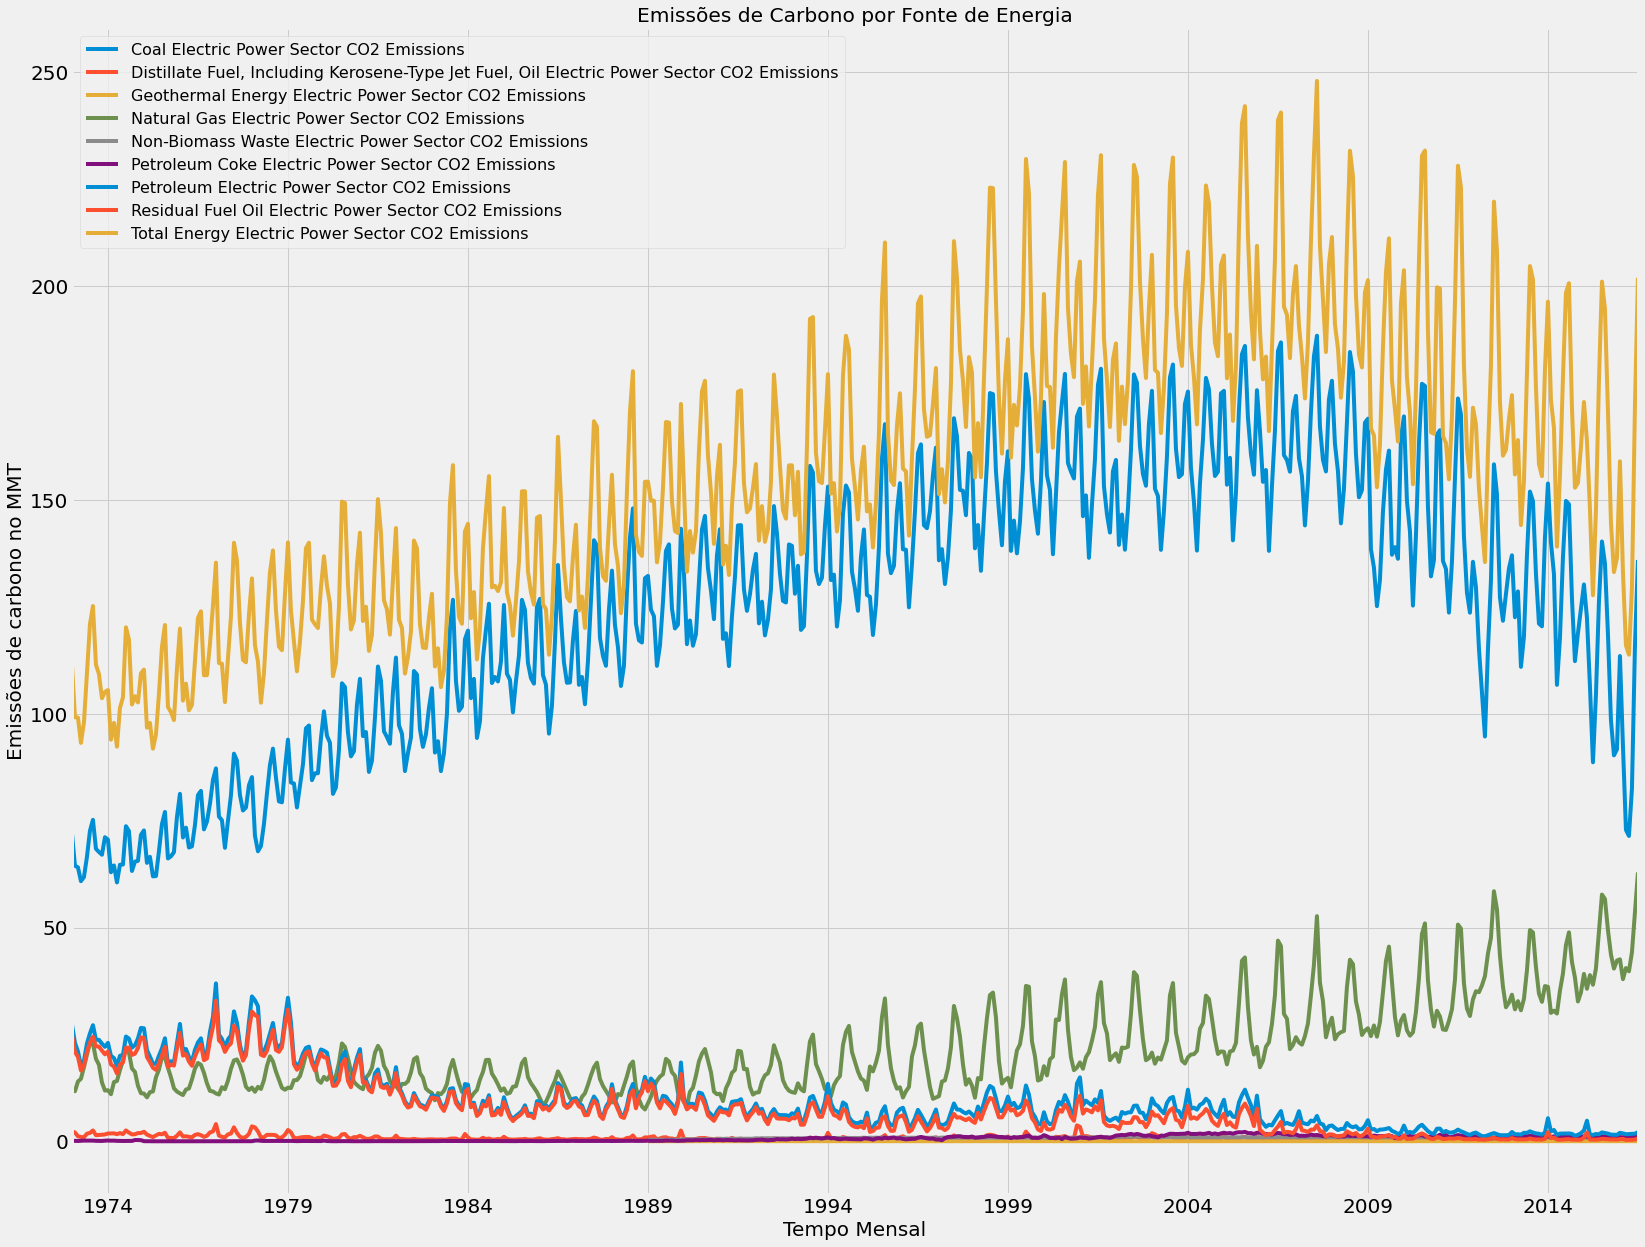

In [22]:
fig, ax = plt.subplots()

for d, group in eng:
    group.plot(y='Value', label=d,ax = ax, title='Emissões de Carbono por Fonte de Energia', fontsize = 20)
    ax.set_xlabel('Tempo Mensal')
    ax.set_ylabel('Emissões de carbono no MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

Individualmente, podemos visualizar o efeito de tendência e sazonalidade na emissão de CO2 de cada fonte de energia. Por exemplo, a emissão de CO2 do carvão mostra uma tendência de aumento de 1973 a 2006 e depois diminui até 2016.

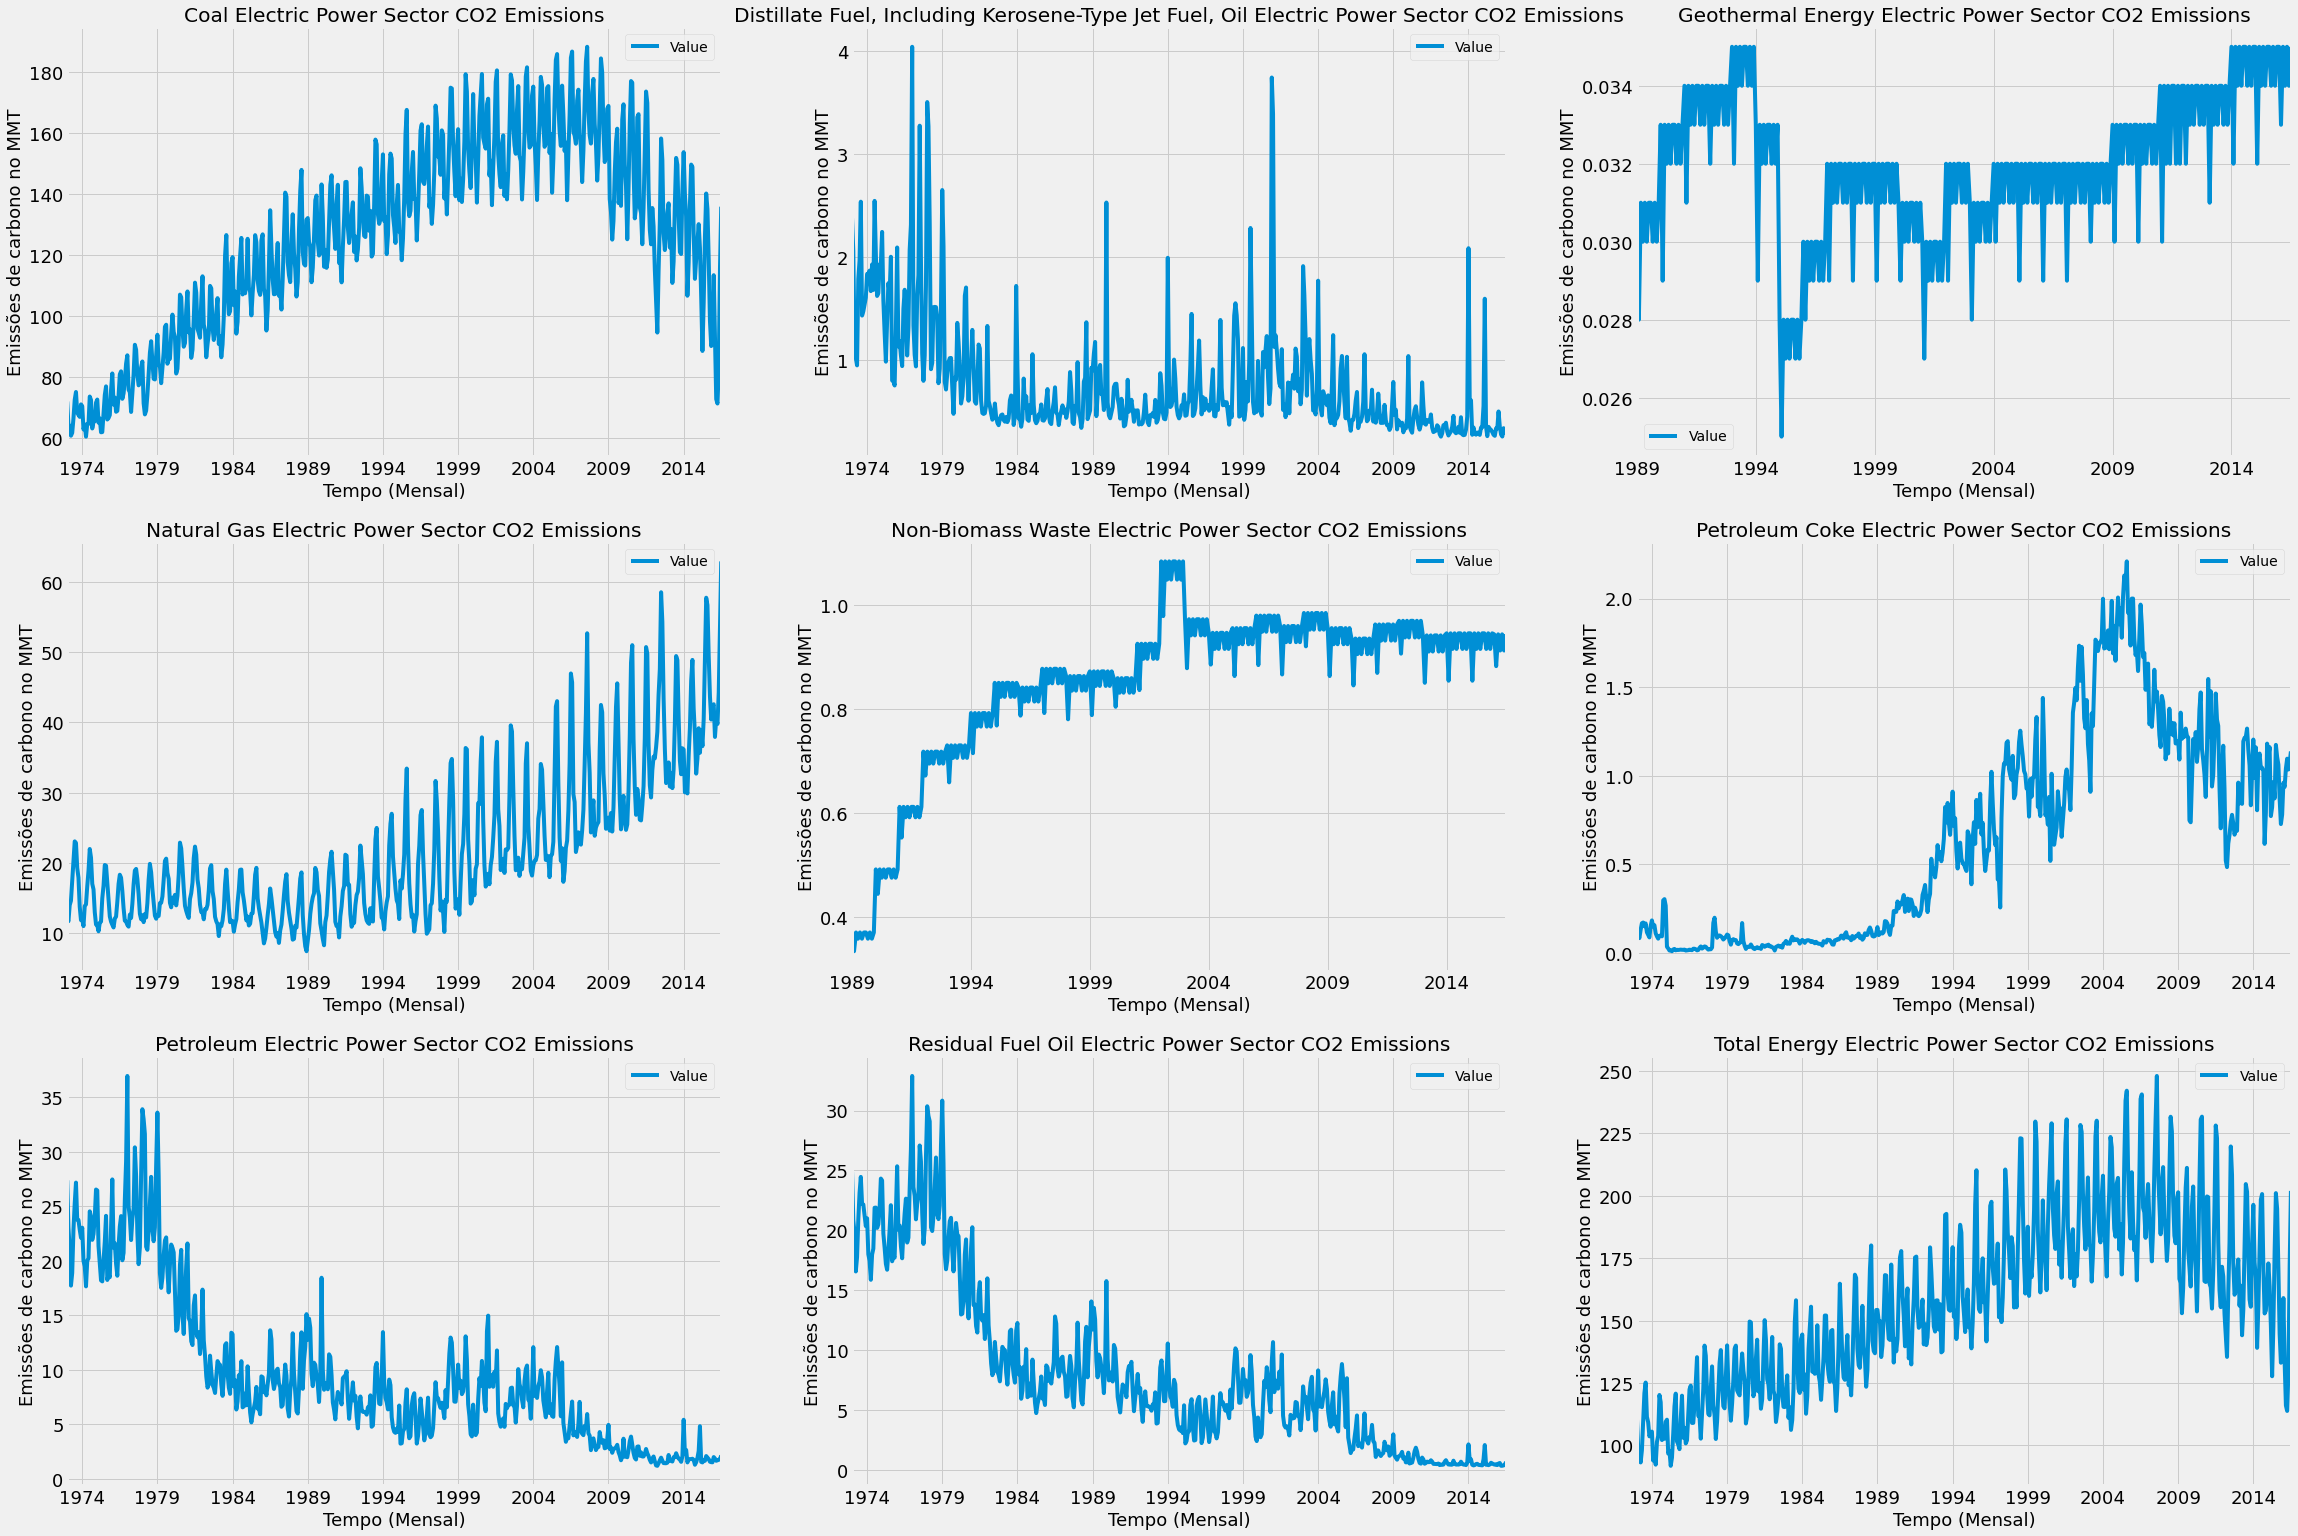

In [23]:
fig, axes = plt.subplots(3,3, figsize = (35.5, 25))

for (desc, group), ax in zip(eng, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Tempo (Mensal)')
    ax.set_ylabel('Emissões de carbono no MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

Nos últimos anos, o consumo de gás natural vem aumentando. No entanto, o uso de carvão para geração de energia vem diminuindo. Os gráficos das emissões de CO2 do carvão e do gás natural mostram esta tendência, ao diminuir a contribuição de CO2 do carvão, há um incremento na contribuição da emissão de CO2 do gás natural.

# 4.3 Gráfico de barras de emissões de CO2 por fonte de energia

In [24]:
eng_co2 = dt.groupby('Description')['Value'].sum().sort_values()

In [25]:
# Quero usar descrições mais curtas para as fontes de energia
eng_co2.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions', 'Non-Biomass Waste Electric Power Sector CO2 Emissions', 'Petroleum Coke Electric Power Sector CO2 Emissions', 'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions', 'Residual Fuel Oil Electric Power Sector CO2 Emissions', 'Petroleum Electric Power Sector CO2 Emissions', 'Natural Gas Electric Power Sector CO2 Emissions', 'Coal Electric Power Sector CO2 Emissions', 'Total Energy Electric Power Sector CO2 Emissions'], dtype='object', name='Description')

In [26]:
cols = ['Geothermal Energy', 
        'Non-Biomass Waste', 
        'Petroleum Coke',
        'Distillate Fuel ',
        'Residual Fuel Oil', 
        'Petroleum', 
        'Natural Gas', 
        'Coal', 
        'Total Emissions']

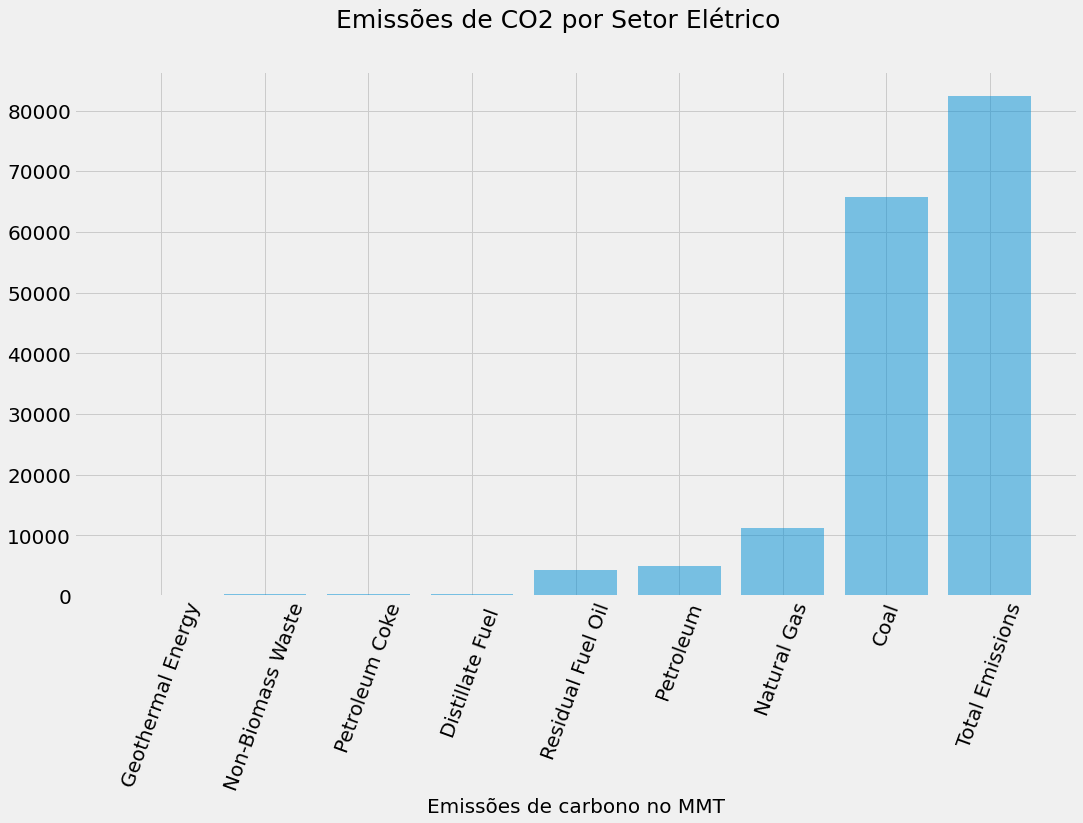

In [27]:
fig = plt.figure(figsize = (16,9))

label = cols
tick = np.arange(len(cols))

plt.bar(tick, eng_co2, align = 'center', alpha = 0.5)
fig.suptitle("Emissões de CO2 por Setor Elétrico", fontsize= 25)
plt.xticks(tick, label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Emissões de carbono no MMT', fontsize = 20)
plt.show()

A partir do gráfico de barras, podemos ver que a contribuição do carvão para a emissão total de CO2 é significativa seguida do gás natural.

# 5) Análise de emissão de CO2 de gás natural

Para desenvolver o modelo de série temporal e fazer a previsão, utilizarei a emissão de CO2 do gás natural proveniente da geração de energia elétrica. Primeiro, vamos fatiar esses dados do ts da seguinte forma:

In [28]:
emi = dt.iloc[:,1:]

In [29]:
emi = emi.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
data = emi['Natural Gas Electric Power Sector CO2 Emissions'] 
data.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [30]:
data.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

# 5.1 Teste Estacionário

A primeira coisa que precisamos fazer é produzir um gráfico de nosso conjunto de dados de série temporal. A partir do enredo, teremos uma ideia sobre a tendência geral e a sazonalidade da série. Em seguida, usaremos um método estatístico para avaliar a tendência e a sazonalidade do conjunto de dados. Depois que a tendência e a sazonalidade forem avaliadas se estiverem presentes no conjunto de dados, elas serão removidas da série para transformar o conjunto de dados não estacionário em estacionário e os resíduos serão posteriormente analisados.

Um breve resumo sobre estacionariedade da Wikipedia: Um processo estacionário é um processo estocástico cuja distribuição de probabilidade conjunta incondicional não muda quando deslocada no tempo. Consequentemente, parâmetros como média e variância, se estiverem presentes, também não mudam ao longo do tempo.

A estacionaridade é uma suposição subjacente a muitos procedimentos estatísticos usados ​​na análise de séries temporais, dados não estacionários são frequentemente transformados para se tornarem estacionários. A causa mais comum de violação da estacionaridade é uma tendência na média, que pode ser devido à presença de uma raiz unitária ou de uma tendência determinística. Se a não estacionariedade é causada pela presença de raiz unitária, os choques estocásticos têm efeitos permanentes e o processo não é reverso à média. No entanto, se for causado por uma tendência determinística, o processo é chamado de processo de tendência estacionária, e os choques estocásticos têm apenas efeitos transitórios, após os quais a variável tende a uma média de evolução determinística.

Um processo estacionário de tendência não é estritamente estacionário, mas pode ser facilmente transformado em um processo estacionário removendo a tendência subjacente, que é apenas uma função do tempo. Da mesma forma, processos com uma ou mais raízes unitárias podem se tornar estacionários por meio da diferenciação. Um tipo importante de processo não estacionário que não inclui um comportamento de tendência é um processo cicloestacionário, que é um processo estocástico que varia ciclicamente com o tempo.

Nota: Dadas duas variáveis ​​aleatórias distribuídas conjuntamente X e Y, a distribuição de probabilidade condicional de Y dado X é a distribuição de probabilidade de Y quando X é conhecido como um valor particular.

In [31]:
import statsmodels
import statsmodels.api as sm

from statsmodels.tsa.stattools import coint, adfuller

# 5.1.1 Teste graficamente estacionário

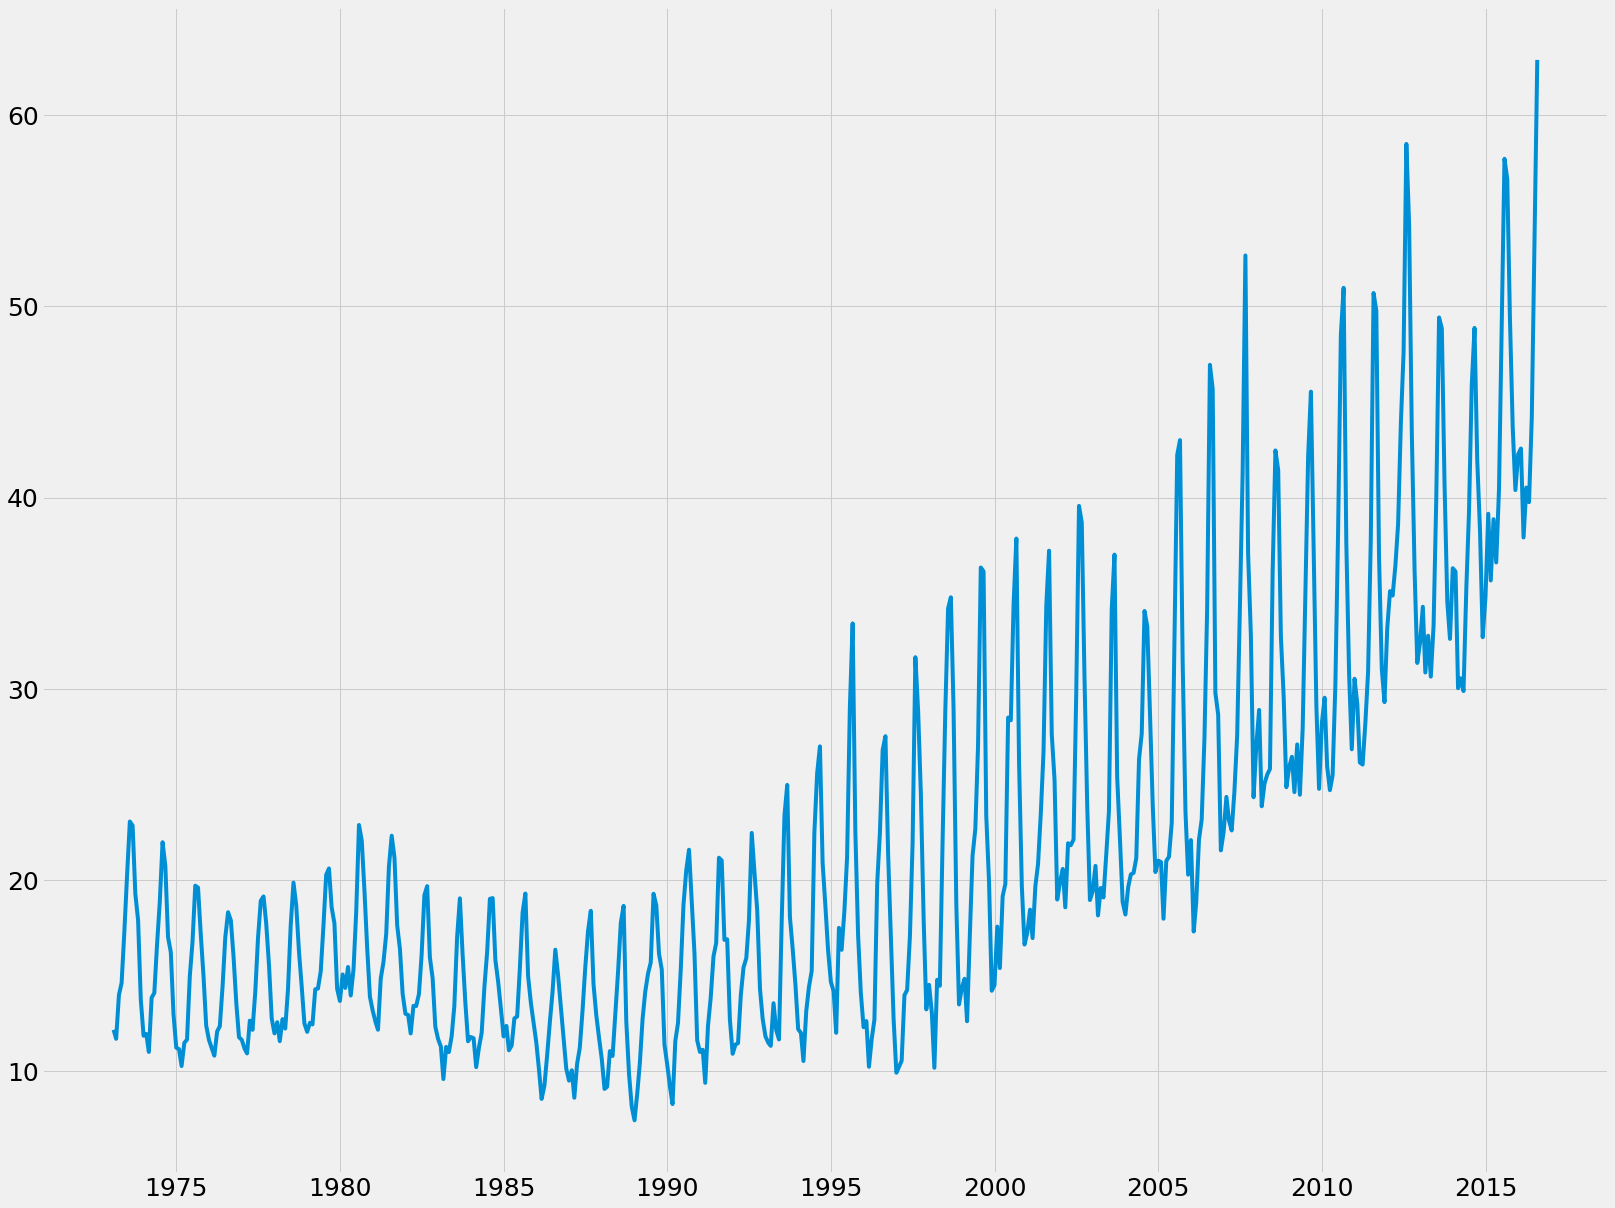

In [32]:
plt.plot(data)

A partir dos números, é evidente que há uma tendência no conjunto de dados de emissão de CO2 com variação sazonal. Assim, podemos inferir que o conjunto de dados não é estacionário.

# 5.1.2 Teste estacionário usando Dickey-Fuller

Uma maneira formal de testar a estacionariedade de um conjunto de dados é usar a plotagem da média móvel ou variância móvel e ver se a média e a variância da série variam com o tempo. Essa abordagem será tratada pelo método TestStationaryPlot(). A segunda maneira de testar a estacionariedade é usar o teste estatístico (o Teste Dickey-Fuller). A hipótese nula para o teste é que a série temporal é não estacionária. Os resultados do teste comparam uma estatística de teste e valores críticos (valor de corte) em diferentes níveis de confiança. Se a ‘Estatística de Teste’ for menor que o ‘Valor Crítico’, podemos rejeitar a hipótese nula e dizer que a série é estacionária. Essa técnica será tratada pelo método TestStationaryAdfuller( ) fornecido abaixo.

In [33]:
def TestStationaryPlot(ts, plot_label = None):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Tempo em anos', fontsize = 25)
    plt.ylabel('Emissões Totais', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    if plot_label is not None:
        plt.title('Média rolante e desvio padrão (' + plot_label + ')', fontsize = 25)
    else:
        plt.title('Média rolante e desvio padrão', fontsize = 25)
    plt.show(block= True)
    
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Estatística de teste','p-value','#Lags Used','Número de observações usadas'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Forte evidência contra a hipótese nula, rejeite a hipótese nula. Os dados não têm raiz unitária, portanto, são estacionários")
    else:
        print("Fraca evidência contra a hipótese nula, a série temporal tem uma raiz unitária, indicando que não é estacionária")

Testando a série temporal de emissões mensais

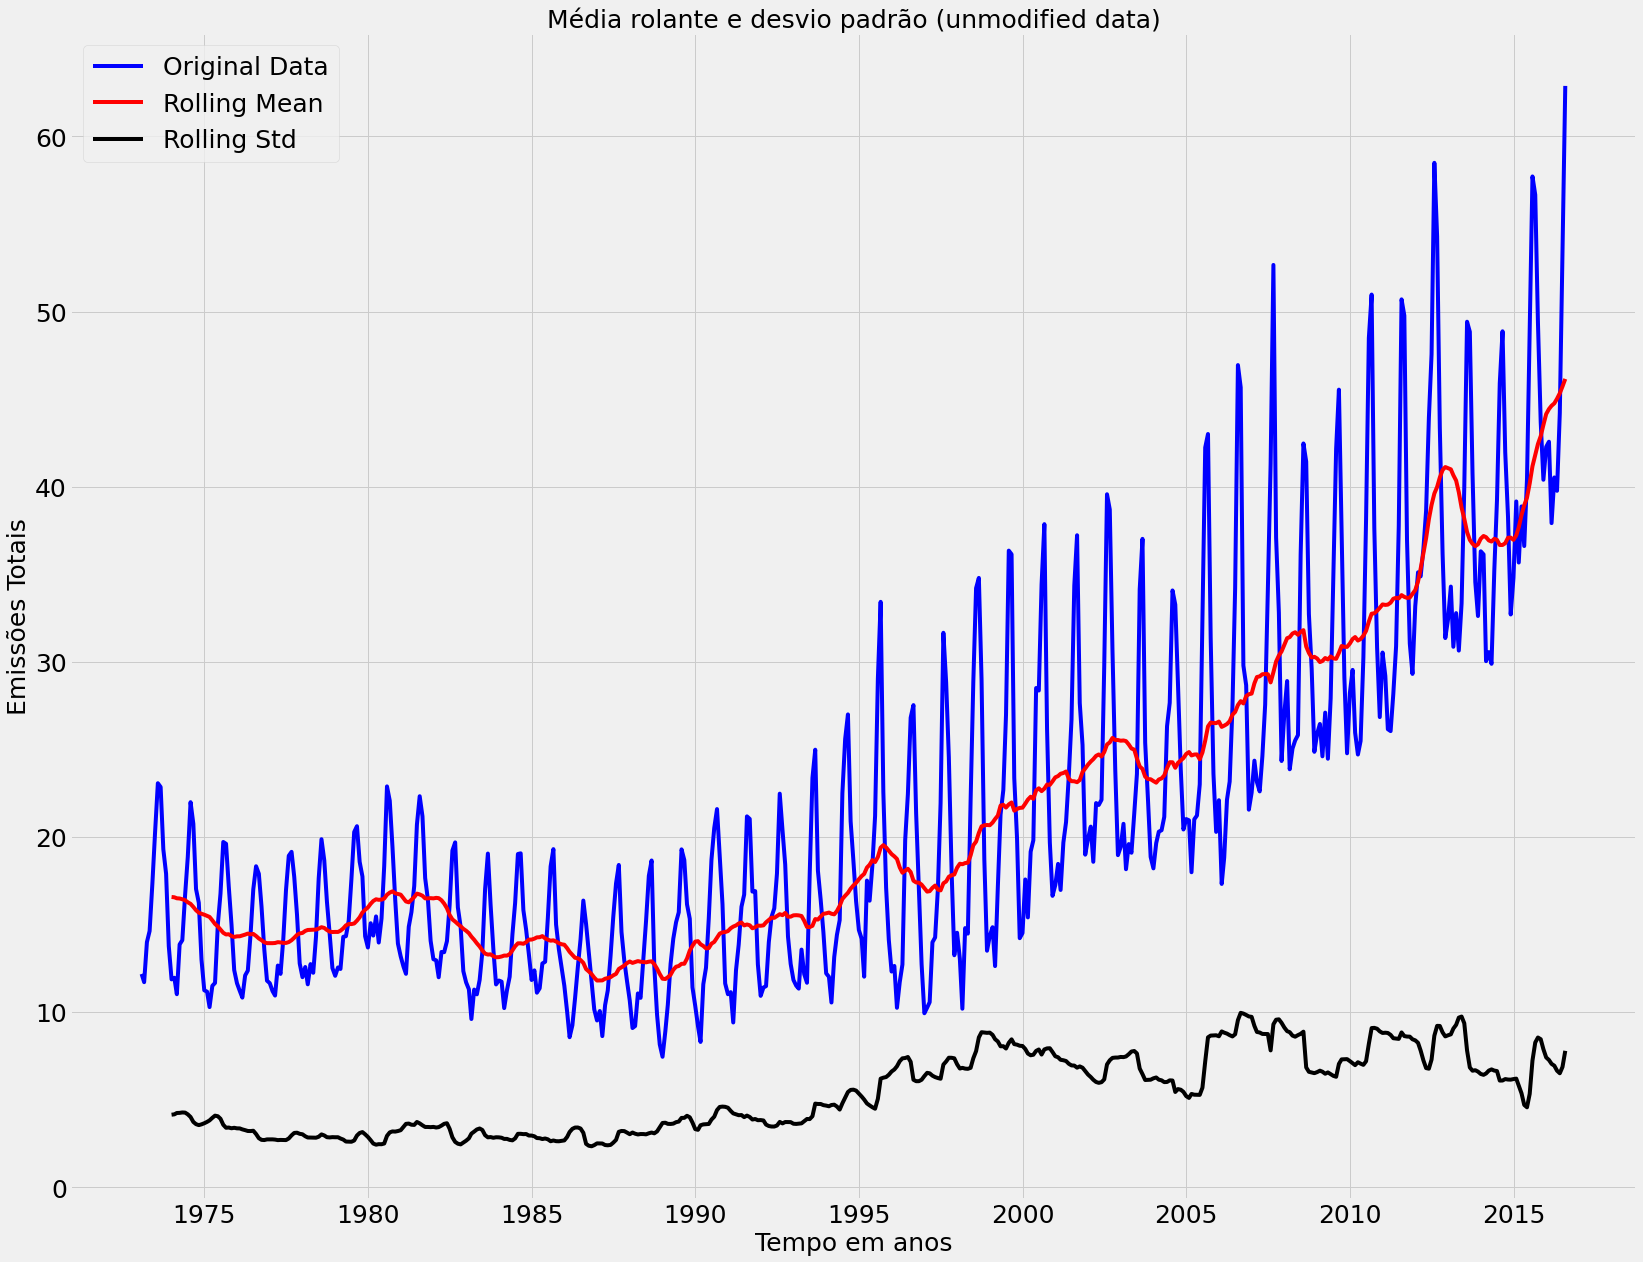

In [34]:
TestStationaryPlot(data, 'unmodified data')

In [35]:
TestStationaryAdfuller(data)

Estatística de teste              1.831215
p-value                           0.998409
#Lags Used                       19.000000
Número de observações usadas    503.000000
Critical Value (1%)              -3.443418
Critical Value (5%)              -2.867303
Critical Value (10%)             -2.569840
dtype: float64
Fraca evidência contra a hipótese nula, a série temporal tem uma raiz unitária, indicando que não é estacionária


A média das emissões e a variação do desvio padrão (linha preta) variam claramente com o tempo. Isso mostra que a série tem uma tendência. Portanto, não é estacionário. Além disso, a estatística de teste é maior que os valores críticos com níveis de confiança de 90%, 95% e 99%. Portanto, nenhuma evidência para rejeitar a hipótese nula. Portanto, a série é não estacionária.

# 5.1.3 Transforme o conjunto de dados em estacionário

As técnicas mais comuns usadas para estimar ou modelar a tendência e depois removê-la da série temporal são

- Agregação – tomando a média por um período de tempo como a média mensal/semanal
- Suavização – tirando médias rolantes
- Ajuste polinomial - ajuste um modelo de regressão

# A) Média móvel

Nesta técnica, tomamos a média de 'k' valores consecutivos dependendo da frequência da série temporal (neste caso 12 meses por ano). Aqui, tomaremos a média do último 1 ano.

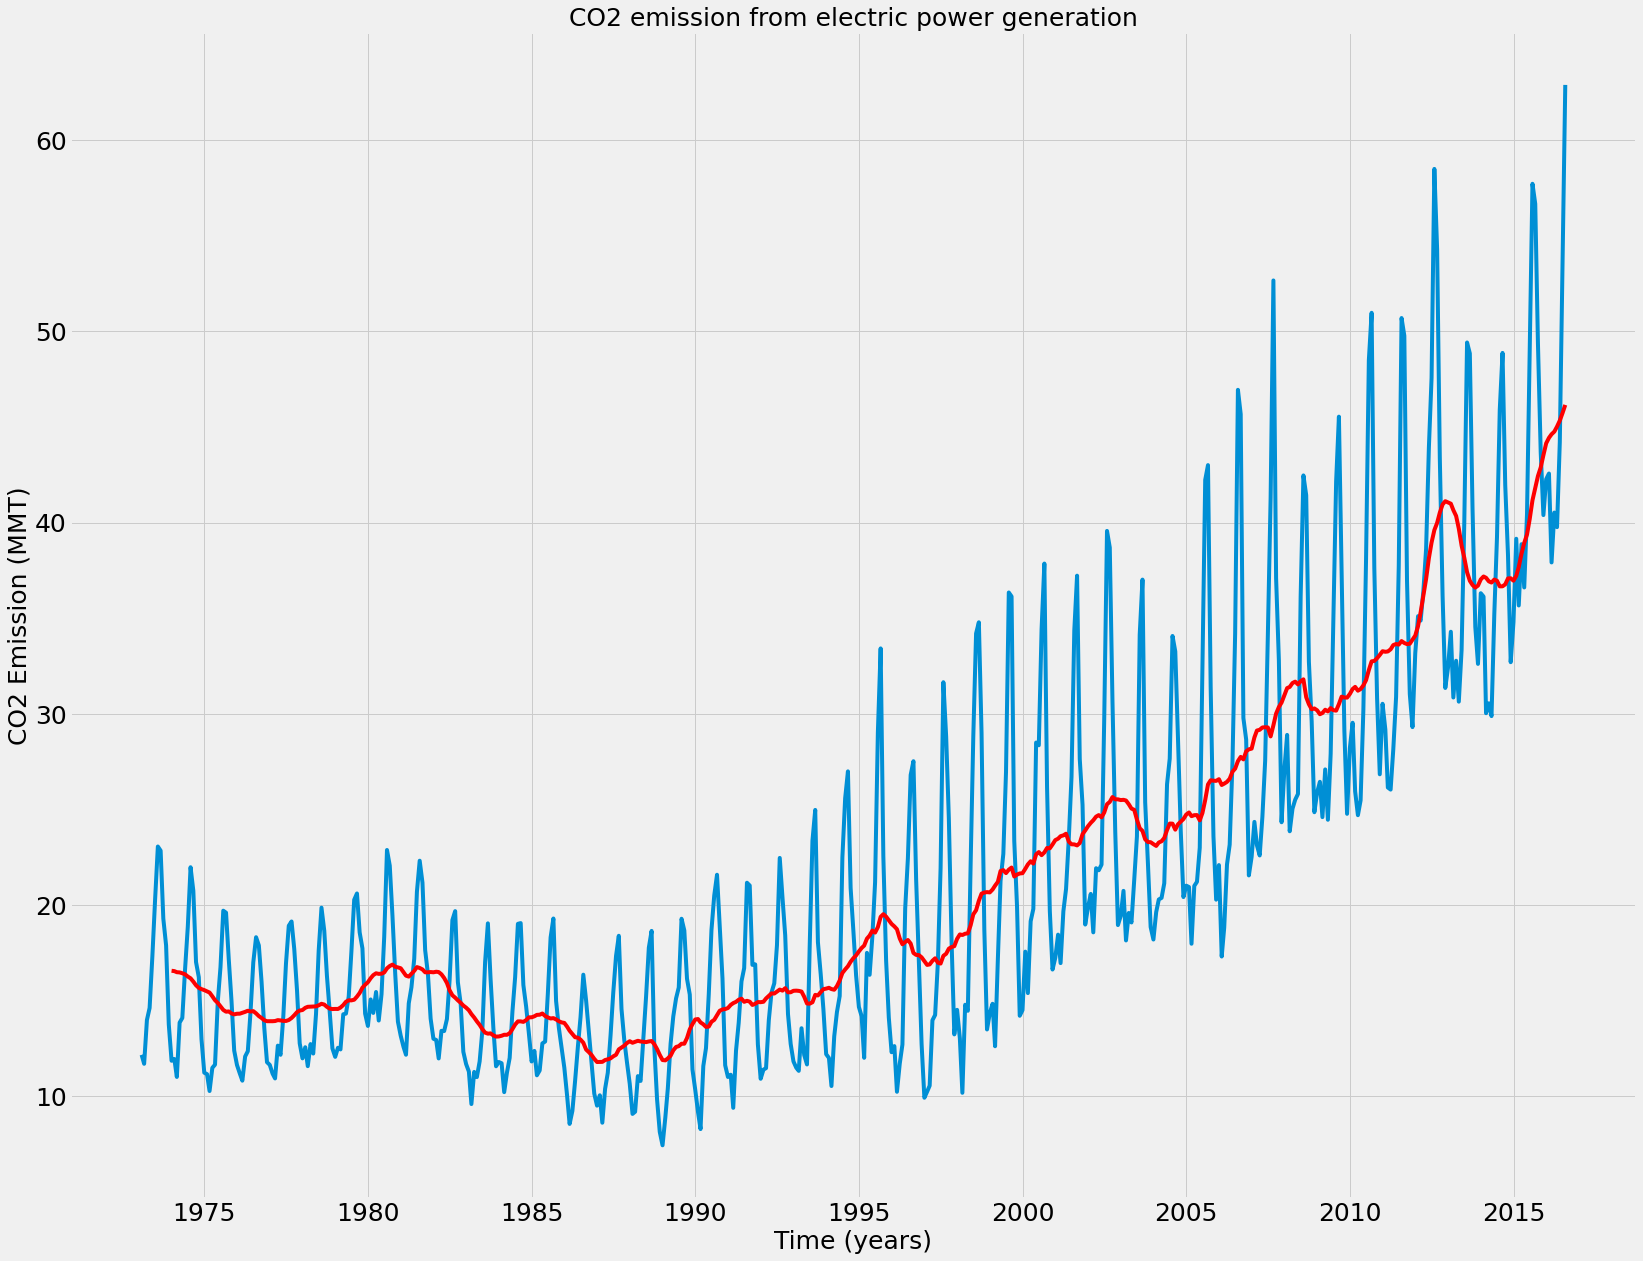

In [36]:
moving_avg = data.rolling(12).mean()
plt.plot(data)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

A linha vermelha mostra a média móvel. Subtraia a média móvel da série original. Observe que, como estamos obtendo a média dos últimos 12 valores, a média móvel não é definida para os primeiros 11 valores.

In [37]:
data_diff = data - moving_avg
data_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

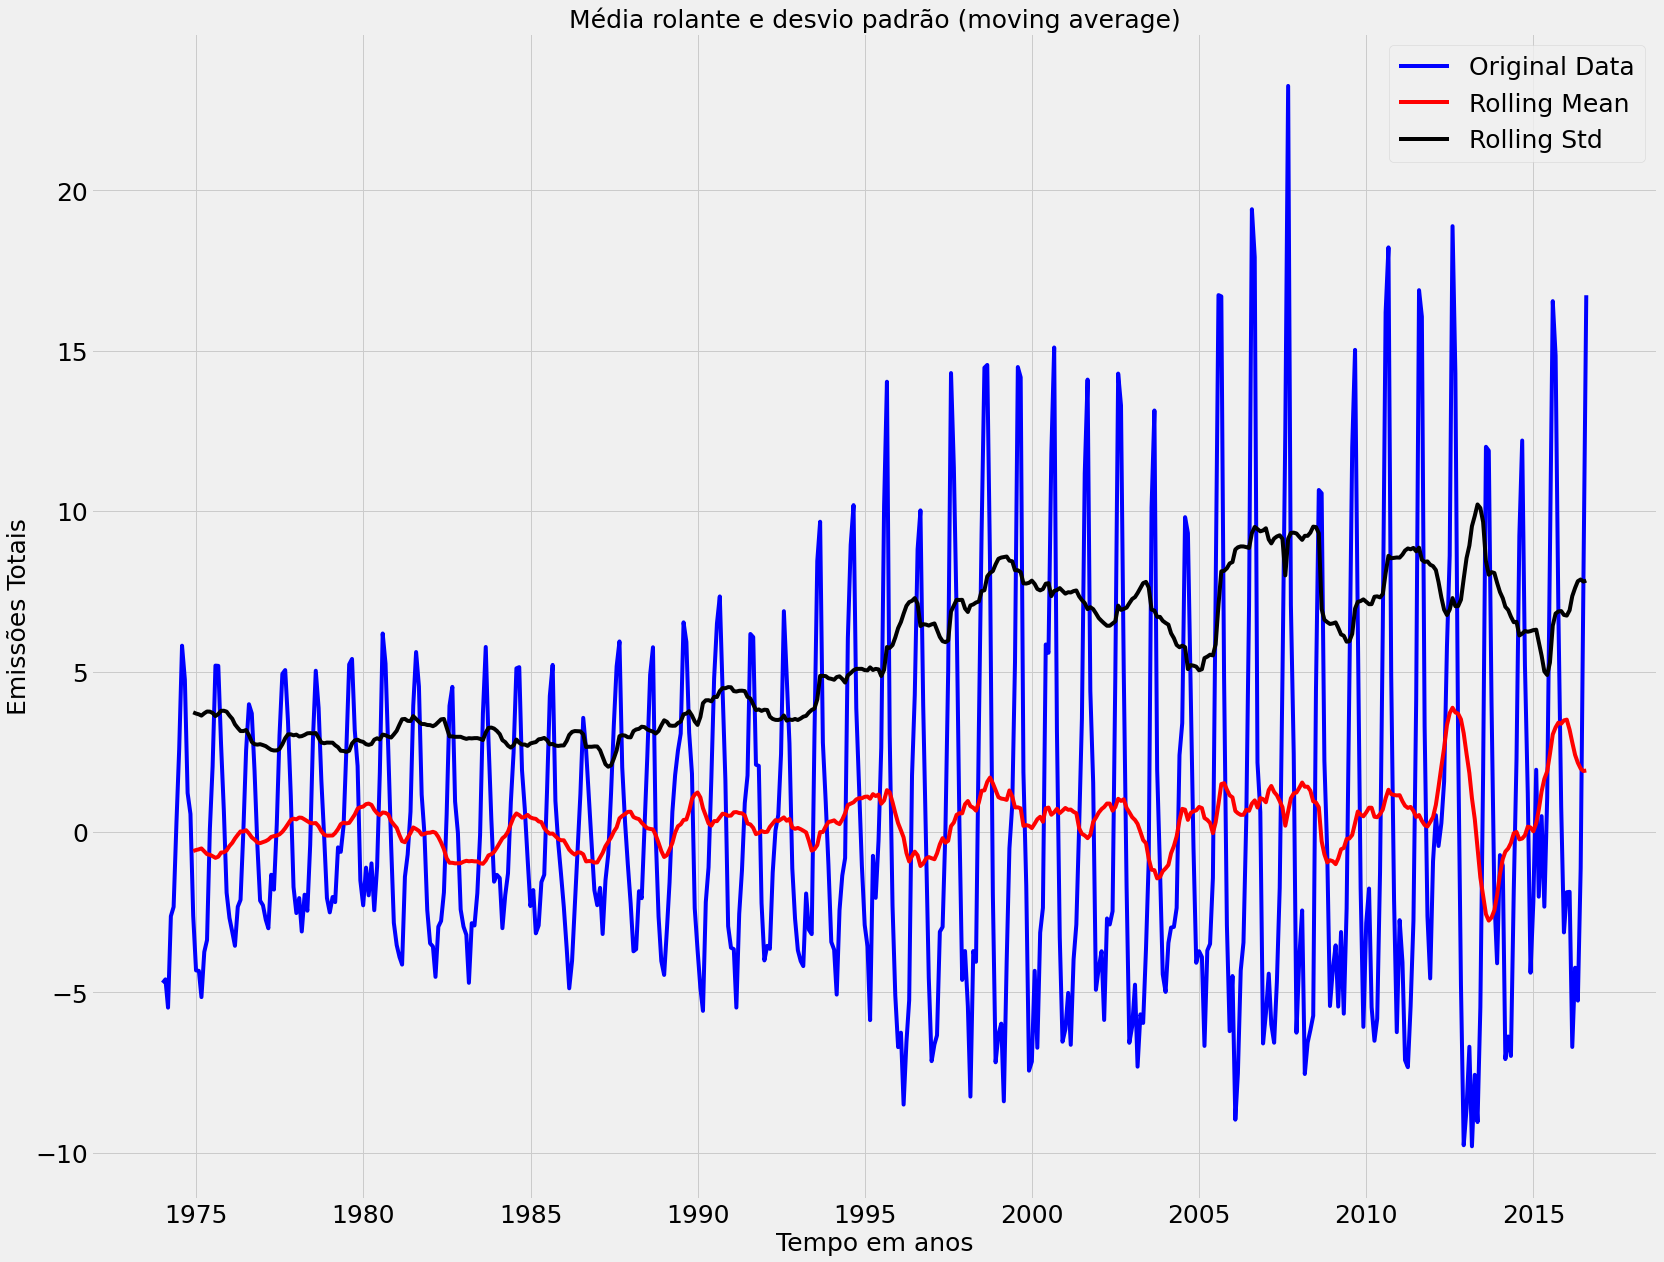

In [38]:
data_diff.dropna(inplace=True)
TestStationaryPlot(data_diff, 'moving average')

In [39]:
TestStationaryAdfuller(data_diff)

Estatística de teste             -5.138977
p-value                           0.000012
#Lags Used                       19.000000
Número de observações usadas    492.000000
Critical Value (1%)              -3.443711
Critical Value (5%)              -2.867432
Critical Value (10%)             -2.569908
dtype: float64
Forte evidência contra a hipótese nula, rejeite a hipótese nula. Os dados não têm raiz unitária, portanto, são estacionários


Os valores médios de rolamento parecem estar variando ligeiramente. A estatística de teste é menor que os 10% 5% e 1% dos valores críticos. Assim, podemos dizer com um nível de confiança de 99% que o conjunto de dados é uma série estacionária.

# B). Média móvel ponderada exponencial

**Outra técnica é usar a 'média móvel ponderada', onde os valores mais recentes recebem um peso maior. O método popular para atribuir os pesos é usar a média móvel ponderada exponencial. Nesta técnica, os pesos são atribuídos a todos os valores anteriores com um fator de decaimento.**

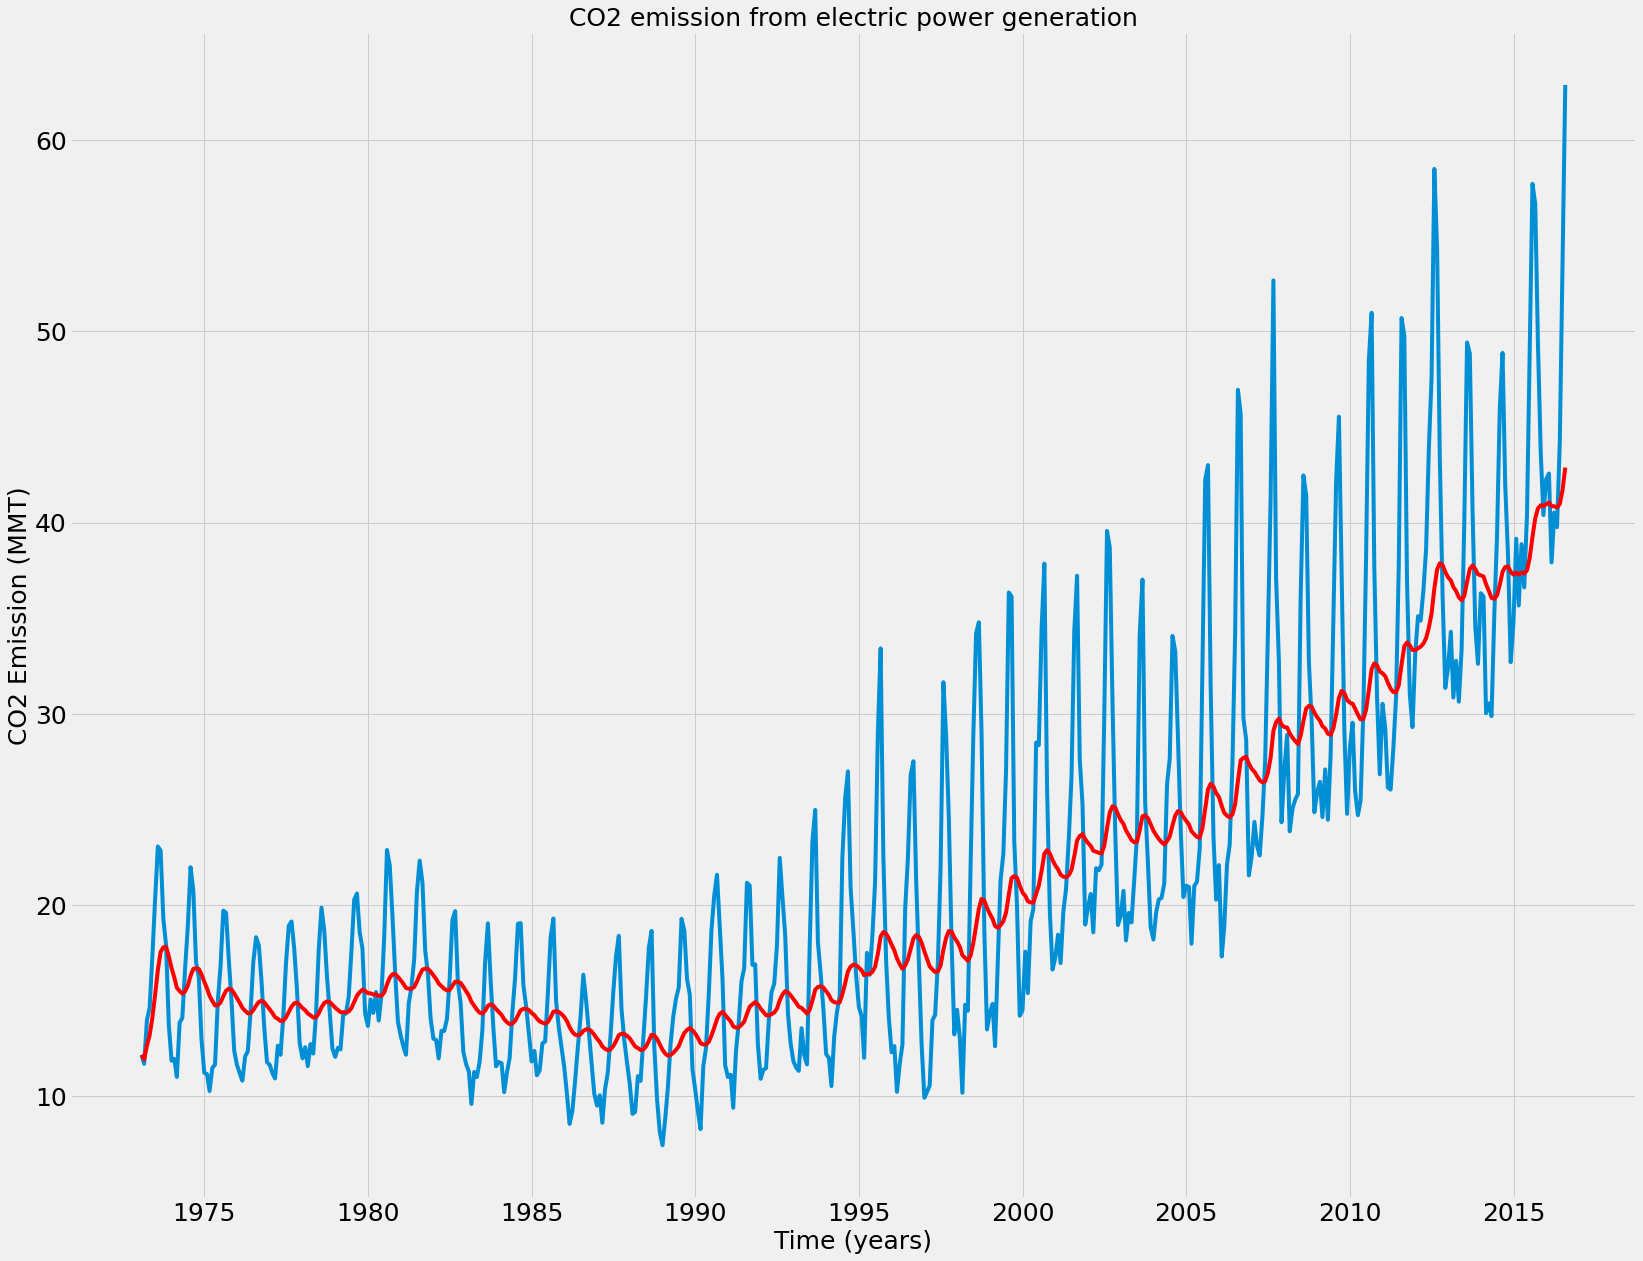

In [40]:
data_avg = data.ewm(halflife=12).mean()

plt.plot(data)
plt.plot(data_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

In [71]:
#mte_ewma_diff = data - mte_exp_wighted_avg
#TestStationaryPlot(mte_ewma_diff, 'exp weighted moving avg')

In [72]:
#TestStationaryAdfuller(mte_ewma_diff)

Esta série temporal apresenta menores variações na média e no desvio padrão em comparação com o conjunto de dados original. Além disso, a estatística de teste é menor que o valor crítico de 5% e 10%, o que é melhor que o caso original. Não haverá valores ausentes, pois todos os valores iniciais recebem pesos. Portanto, funcionará mesmo sem valores anteriores. Neste caso, podemos dizer com nível de confiança de 95% que a série é uma série estacionária.

# C) Eliminando tendência e sazonalidade: Diferenciando

Um dos métodos mais comuns de lidar com tendência e sazonalidade é a diferenciação. Nesta técnica, tomamos a diferença da observação original em um determinado instante com a do instante anterior. Isso geralmente funciona bem para melhorar a estacionariedade. A diferenciação de primeira ordem pode ser feita da seguinte forma:

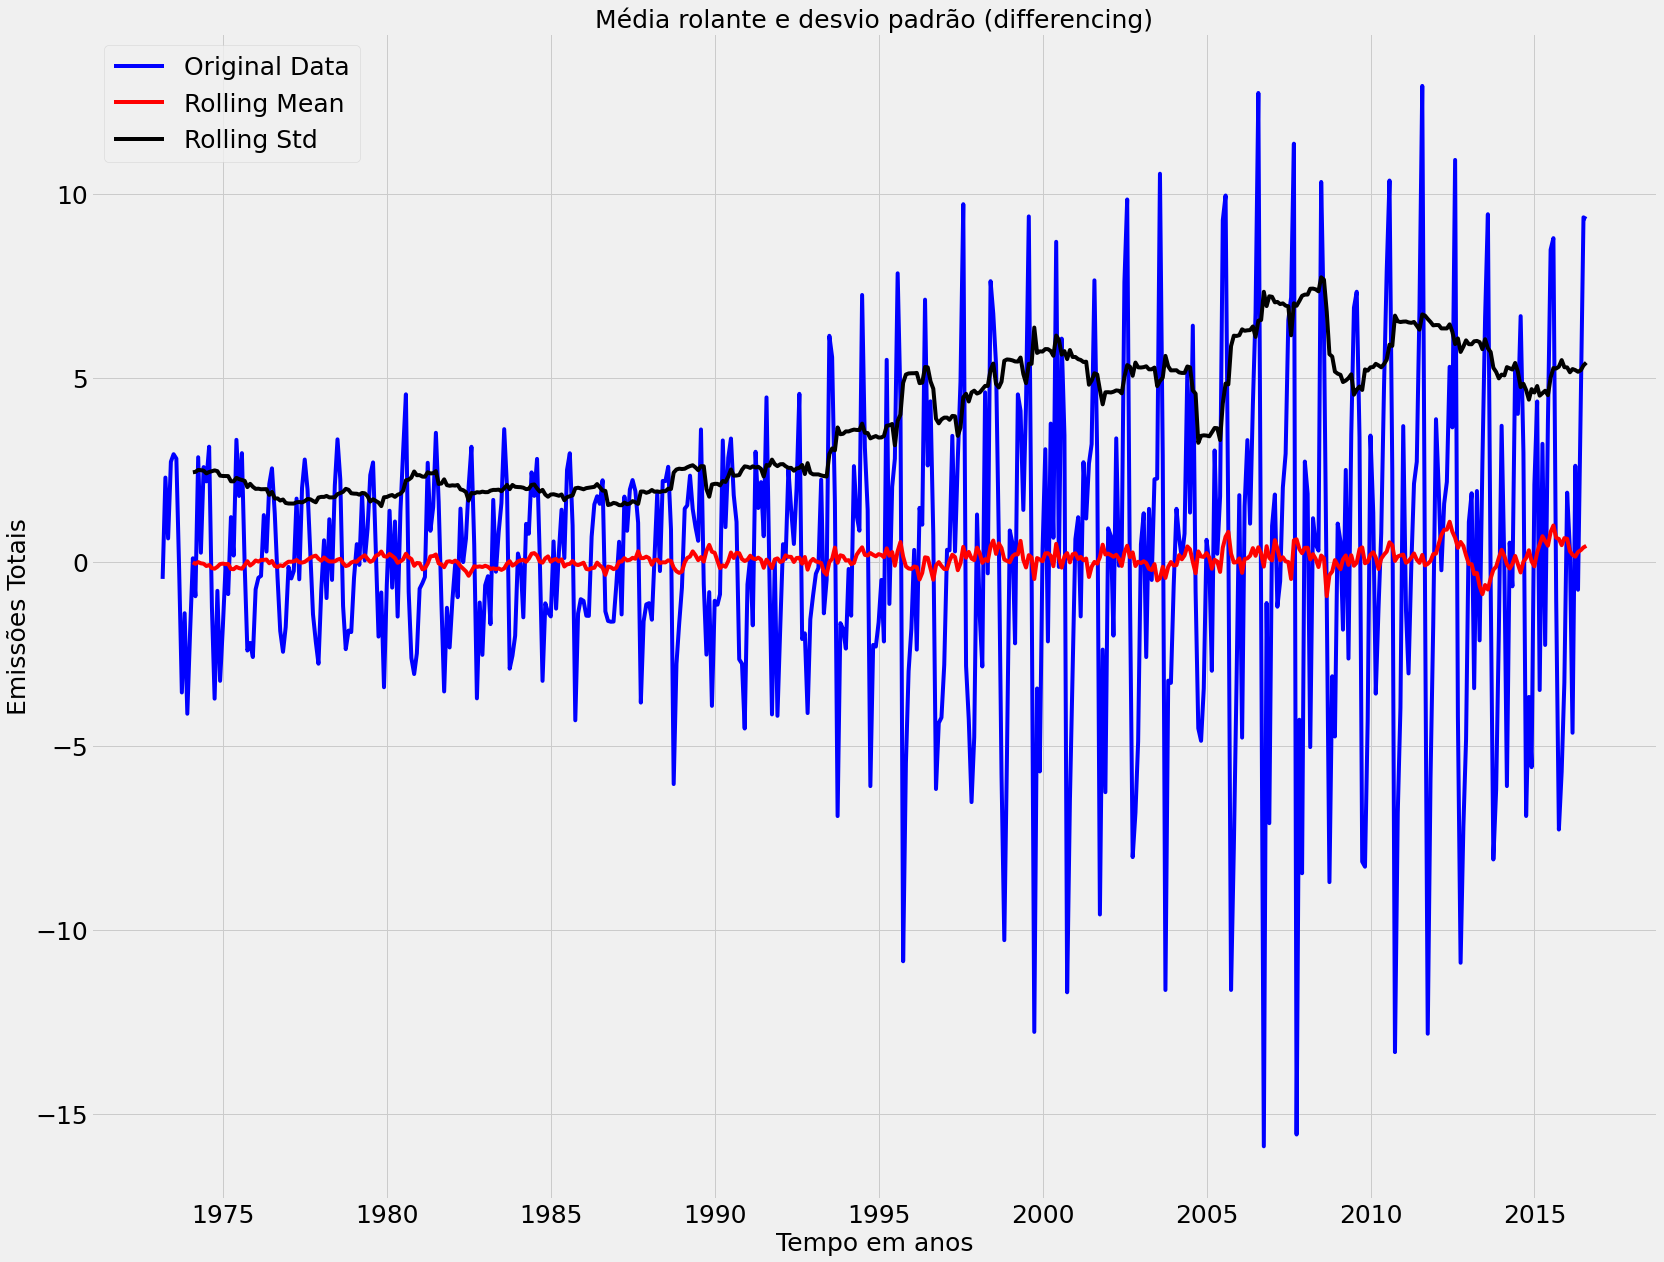

In [45]:
mte_first_difference = data - data.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False), 'differencing')

In [46]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Estatística de teste             -5.435116
p-value                           0.000003
#Lags Used                       18.000000
Número de observações usadas    503.000000
Critical Value (1%)              -3.443418
Critical Value (5%)              -2.867303
Critical Value (10%)             -2.569840
dtype: float64
Forte evidência contra a hipótese nula, rejeite a hipótese nula. Os dados não têm raiz unitária, portanto, são estacionários


A primeira diferença melhora significativamente a estacionariedade da série. Vamos usar também a diferença sazonal para remover a sazonalidade dos dados e ver como isso afeta a estacionariedade dos dados.

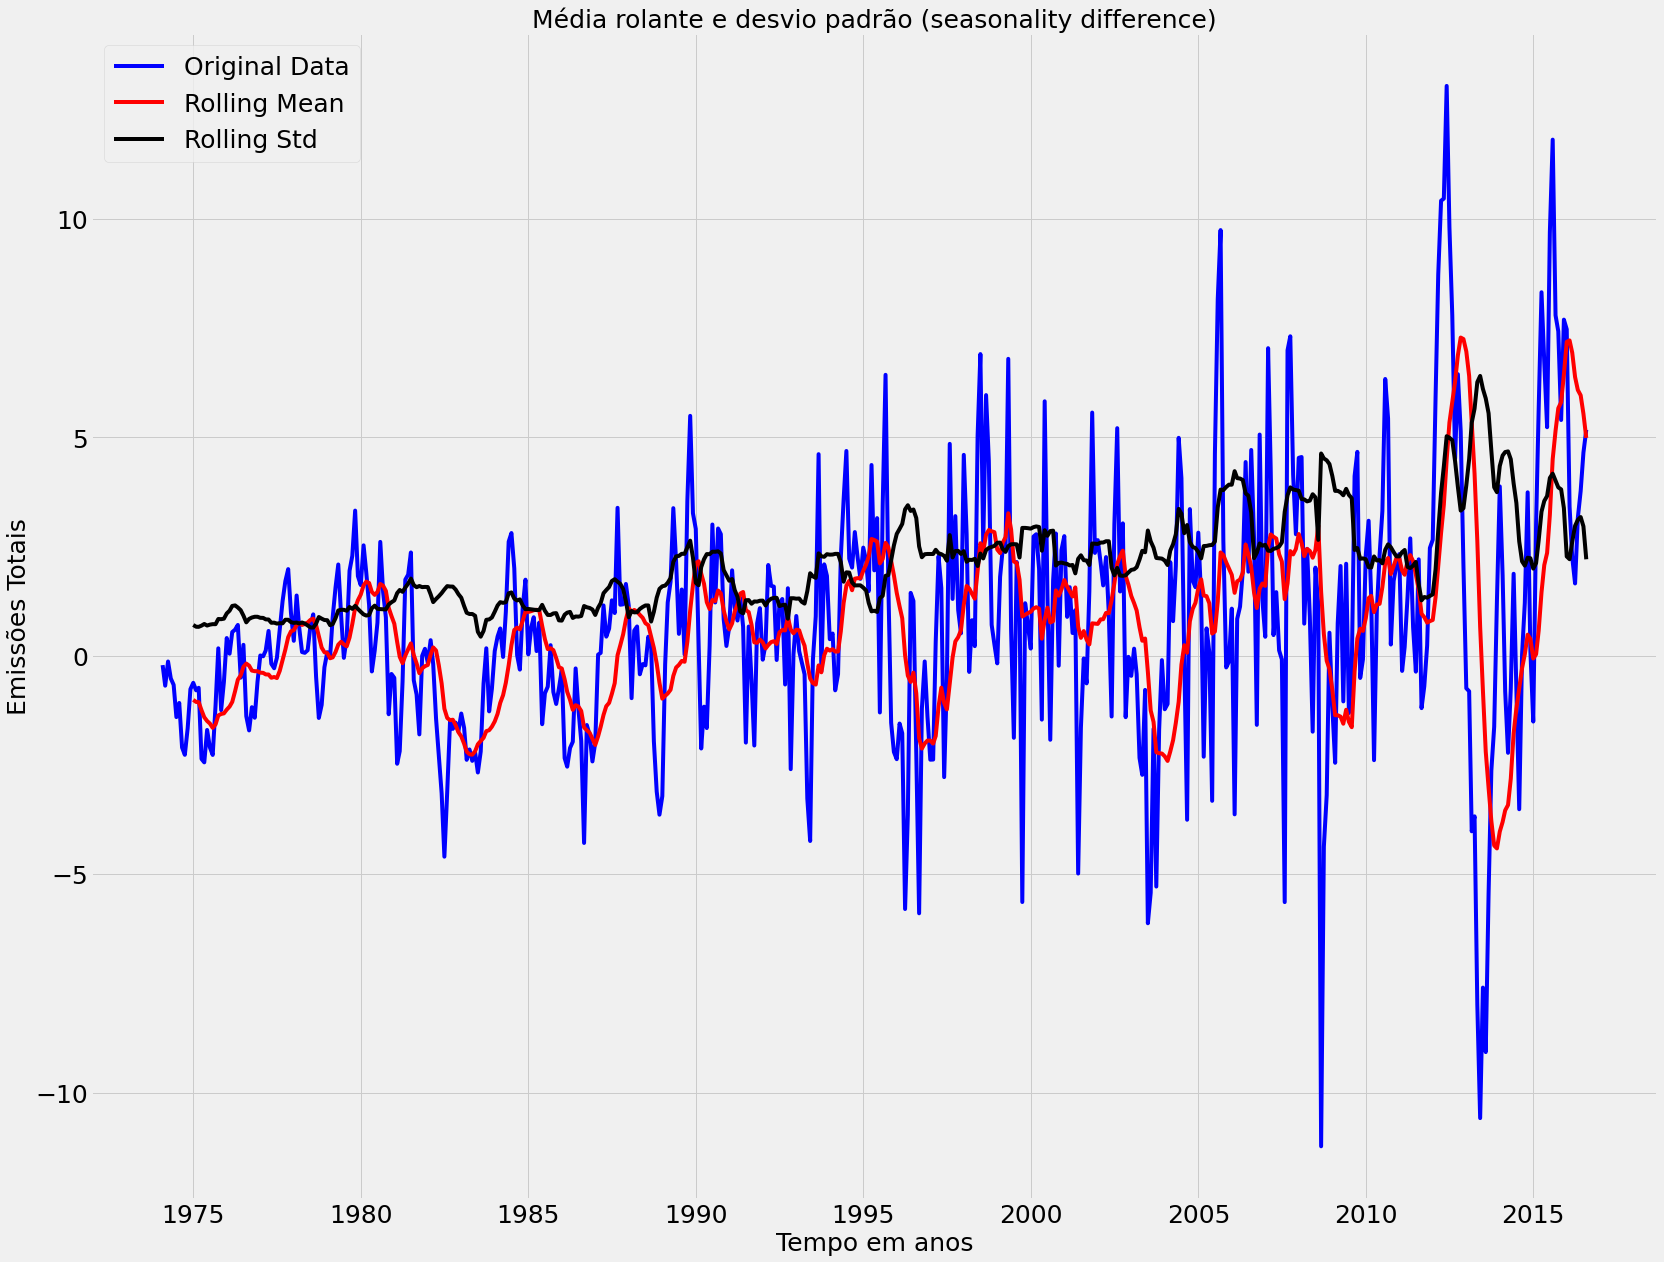

Estatística de teste             -4.412396
p-value                           0.000282
#Lags Used                       13.000000
Número de observações usadas    497.000000
Critical Value (1%)              -3.443576
Critical Value (5%)              -2.867373
Critical Value (10%)             -2.569877
dtype: float64
Forte evidência contra a hipótese nula, rejeite a hipótese nula. Os dados não têm raiz unitária, portanto, são estacionários


In [47]:
mte_seasonal_difference = data - data.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False), 'seasonality difference')
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

Em comparação com os dados originais, a diferença sazonal também melhora a estacionariedade da série. O próximo passo é tirar a primeira diferença da diferença sazonal.

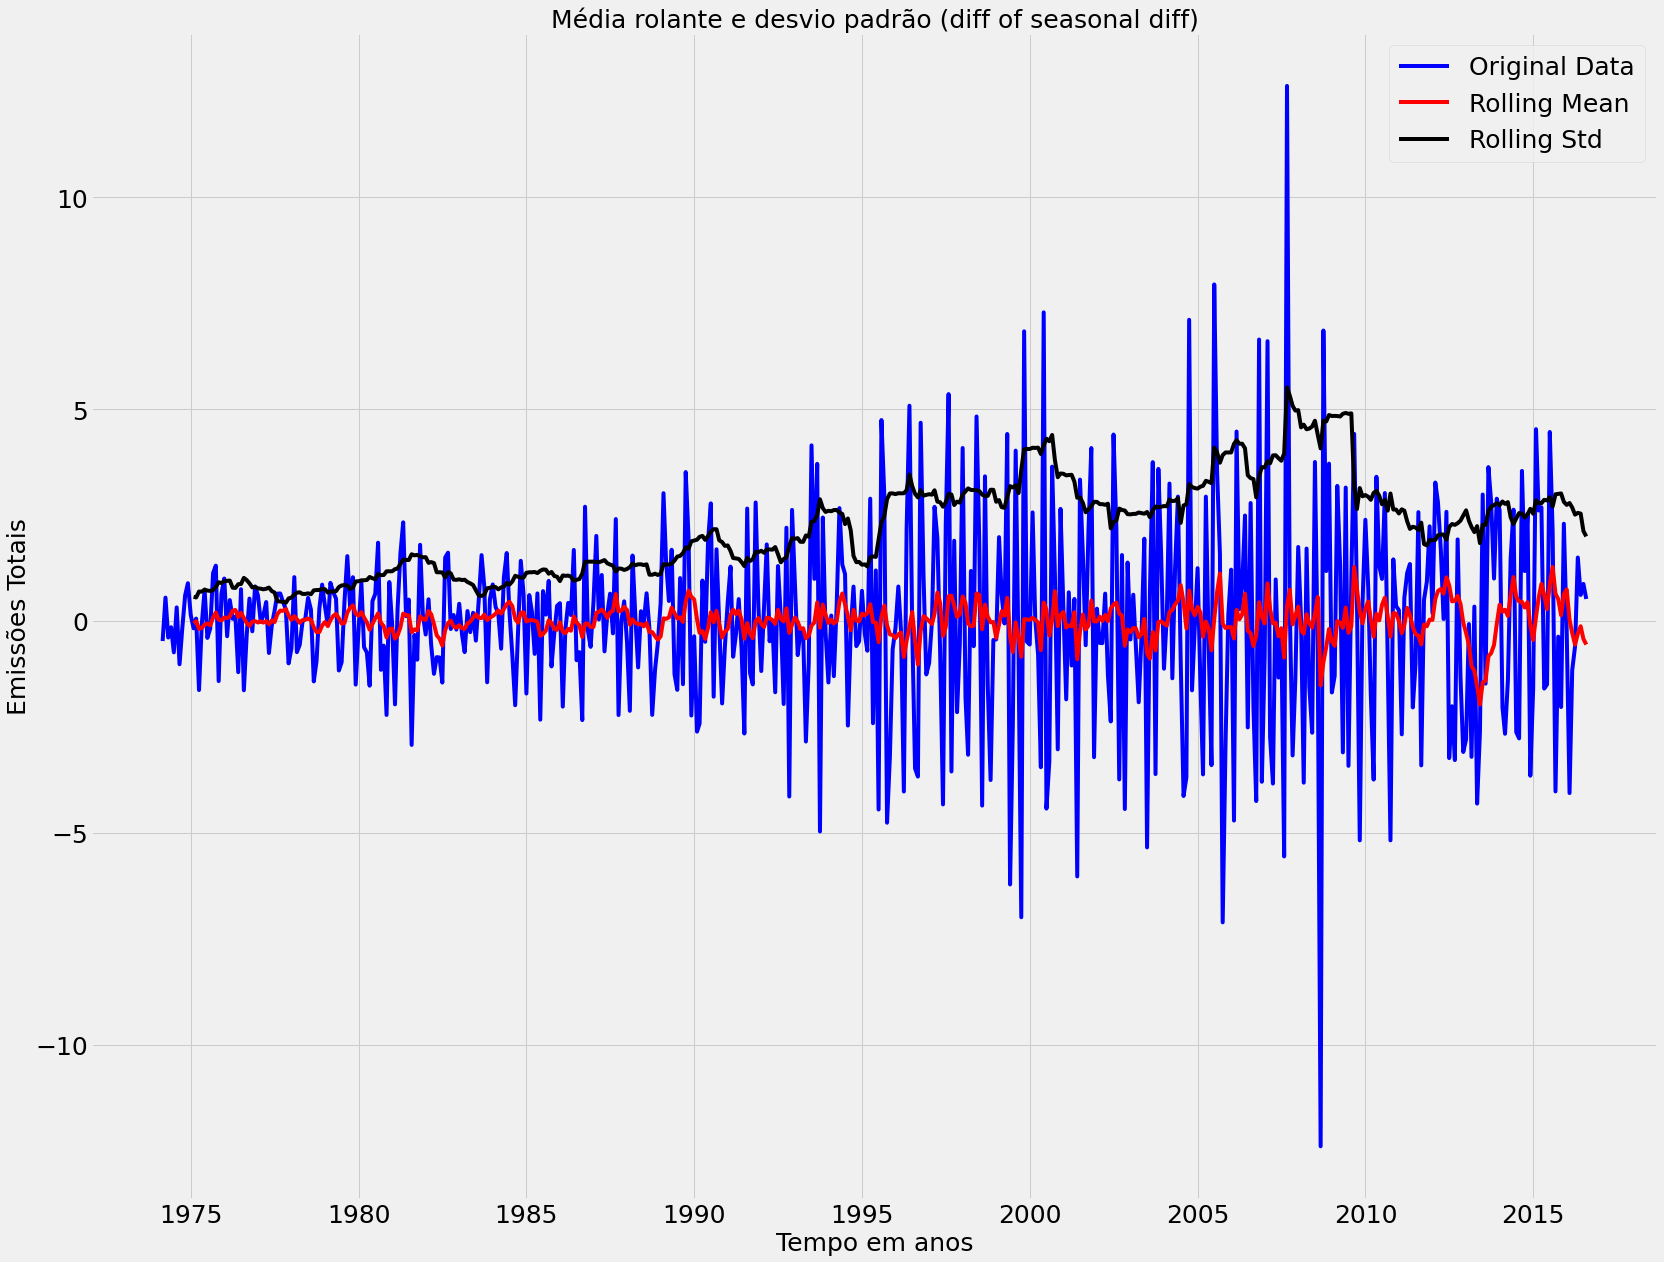

In [48]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False), 'diff of seasonal diff')

In [49]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Estatística de teste           -1.009743e+01
p-value                         1.081539e-17
#Lags Used                      1.200000e+01
Número de observações usadas    4.970000e+02
Critical Value (1%)            -3.443576e+00
Critical Value (5%)            -2.867373e+00
Critical Value (10%)           -2.569877e+00
dtype: float64
Forte evidência contra a hipótese nula, rejeite a hipótese nula. Os dados não têm raiz unitária, portanto, são estacionários


Agora, se observarmos a estatística de teste e o valor p, a primeira diferença sazonal tornou o conjunto de dados da série temporal estacionário. Esse procedimento de diferenciação pode ser repetido para os valores de log, mas não tornou o conjunto de dados mais estacionário.

# D) Eliminando tendência e sazonalidade: Decompondo

Nesta técnica, comece modelando a tendência e a sazonalidade e removendo-as do modelo.

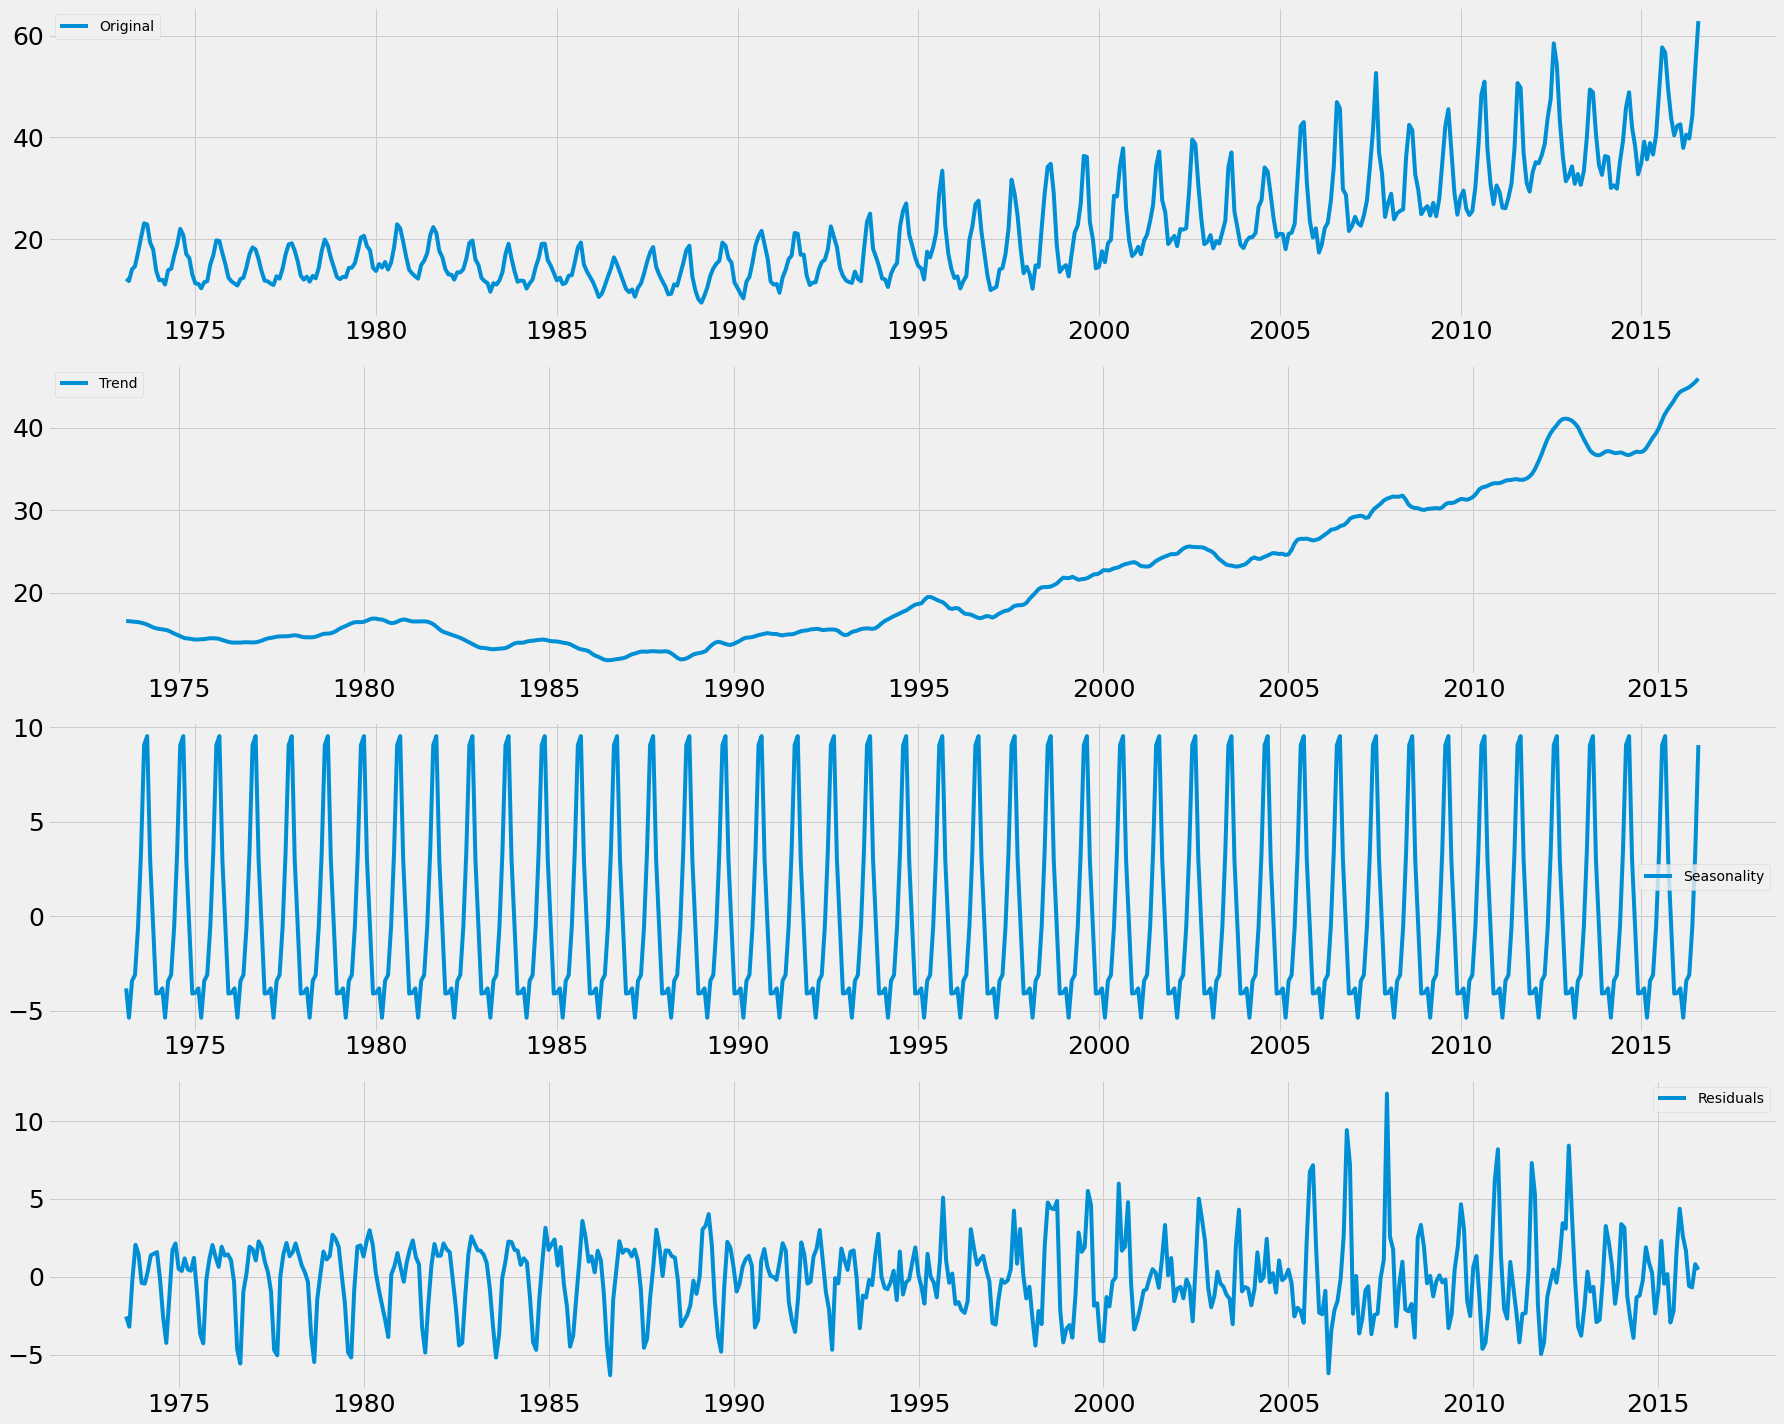

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Aqui podemos ver que a tendência, a sazonalidade são separadas dos dados e podemos modelar os resíduos. Vamos verificar a estacionariedade dos resíduos:

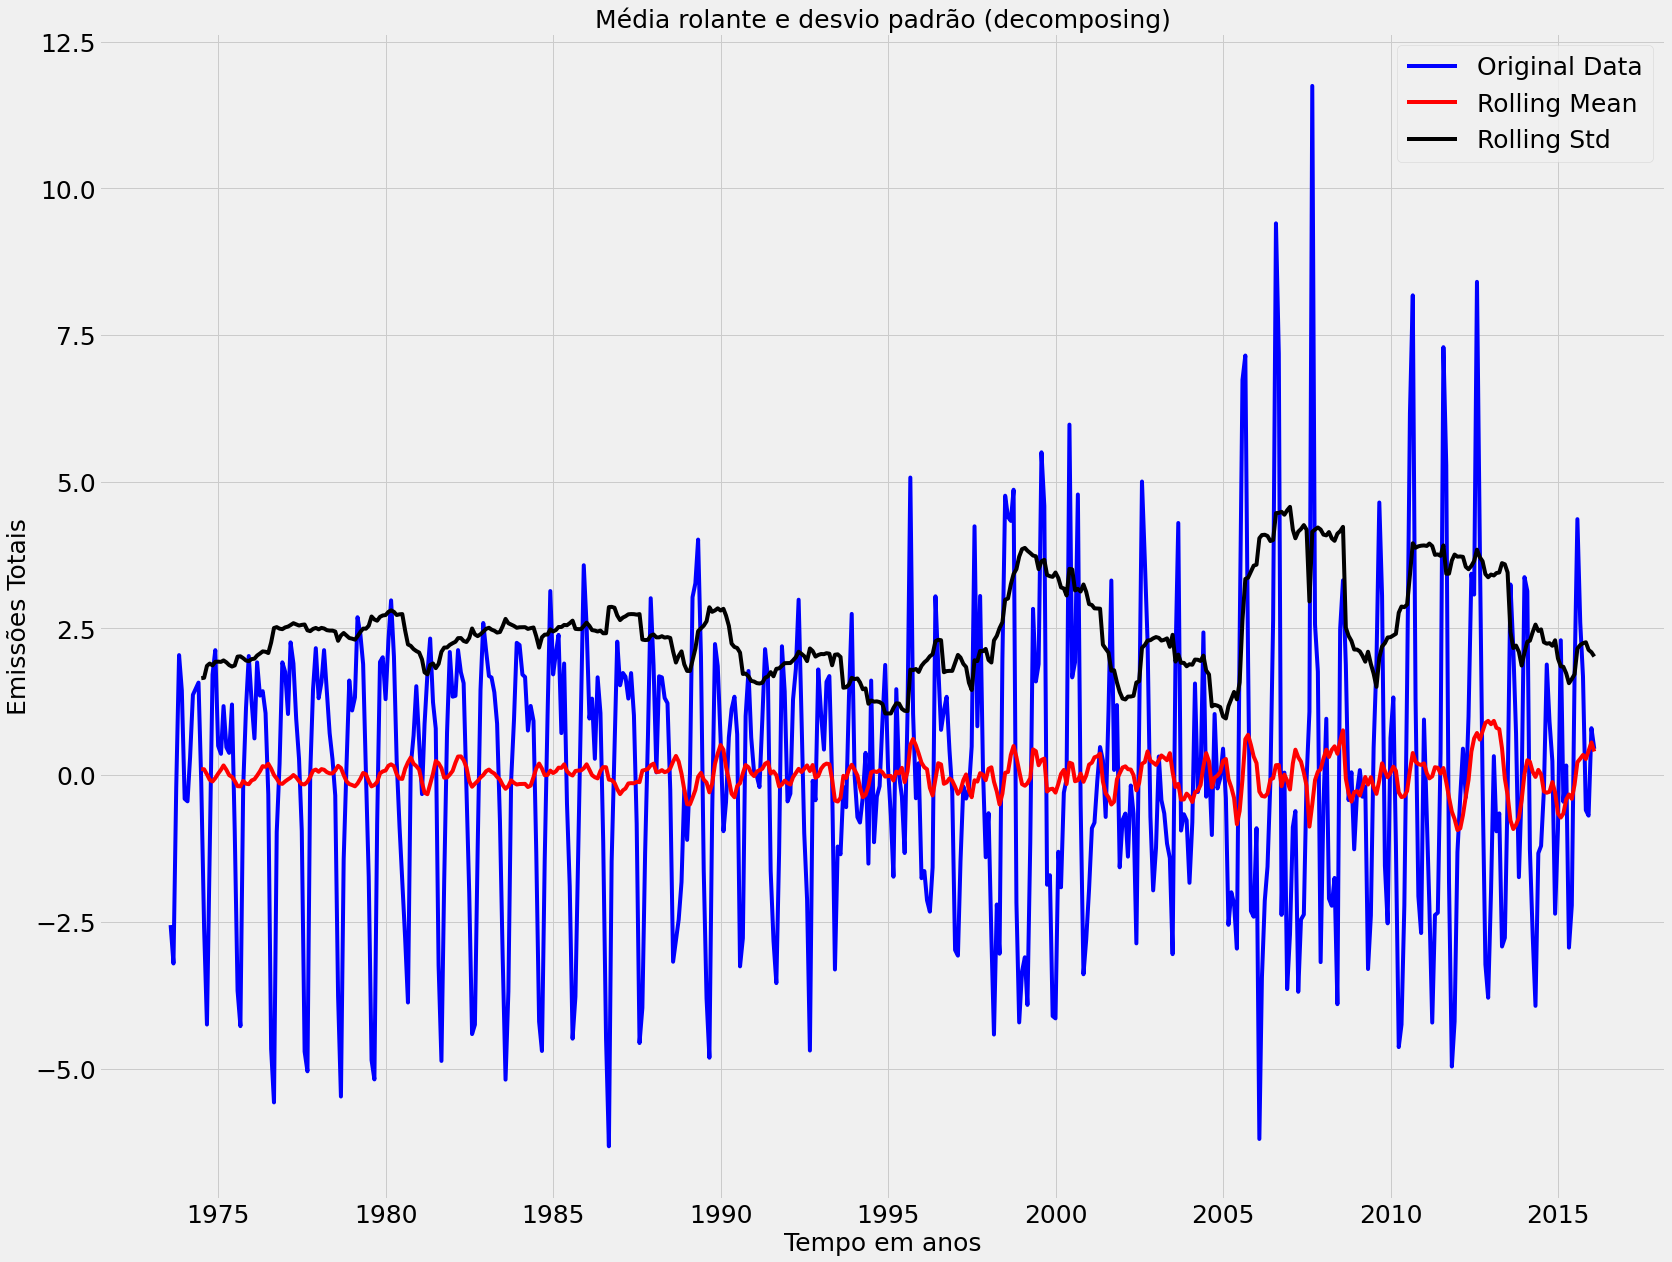

Estatística de teste           -8.547084e+00
p-value                         9.439345e-14
#Lags Used                      1.900000e+01
Número de observações usadas    4.910000e+02
Critical Value (1%)            -3.443739e+00
Critical Value (5%)            -2.867444e+00
Critical Value (10%)           -2.569915e+00
dtype: float64
Forte evidência contra a hipótese nula, rejeite a hipótese nula. Os dados não têm raiz unitária, portanto, são estacionários


In [51]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose, 'decomposing')
TestStationaryAdfuller(mte_decompose)

# 6) Encontre os parâmetros ideais e construa o modelo SARIMA

Ao procurar ajustar o conjunto de dados de séries temporais com o modelo ARIMA sazonal, nosso primeiro objetivo é encontrar os valores de SARIMA(p,d,q)(P,D,Q)s que otimizam nossa métrica de interesse. Antes de passar diretamente como encontrar os valores ótimos dos parâmetros vamos ver as duas situações em estacionaridades: Uma série estritamente estacionária sem dependência entre os valores. Este é o caso fácil em que podemos modelar os resíduos como ruído branco. O segundo caso é uma série com dependência significativa entre valores e necessita de modelos estatísticos como ARIMA para prever resultados futuros.

**Média Móvel Integrada Auto-Regressiva (ARIMA):** A previsão ARIMA para uma série temporal estacionária é uma função linear semelhante à regressão linear. Os preditores dependem principalmente dos parâmetros (p,d,q) do modelo ARIMA:

- **Número de termos auto-regressivos (AR) (p):** Os termos AR são apenas defasagens da variável dependente. Por exemplo, se p é 4, os preditores para x(t) dependerão de x(t-1)….x(t-4). Este termo nos permite incorporar o efeito de valores passados ​​em nosso modelo. Isso seria semelhante a afirmar que o clima provavelmente estará quente amanhã se estiver quente nos últimos 4 dias.


- **Número de termos de Média Móvel (MA) (q):** Os termos de MA são erros de previsão defasados ​​na função de previsão. Este termo nos permite definir o erro do nosso modelo como uma combinação linear dos valores de erro observados em pontos de tempo anteriores no passado. Por exemplo, se q é 4, os preditores para x(t) serão e(t-1)….e(t-4) onde e(i) é a diferença entre a média móvel no instante i e o valor real.


- **Número de Diferenças (d):** São o número de diferenças não sazonais, ou seja, se tomarmos a diferença de primeira ordem. Então ou podemos passar a variável de diferença de primeira ordem e colocar d=0 ou passar a variável observada original e colocar d=1. Ambos irão gerar os mesmos resultados. Este termo explica o número de pontos de tempo passados ​​a serem subtraídos do valor atual. Isso seria semelhante a afirmar que é provável que amanhã seja a mesma temperatura se a diferença de temperatura nos últimos três dias tiver sido muito pequena.

# 6.1 Plote os gráficos ACF e PACF e encontre os parâmetros ideais

- Função de Autocorrelação (ACF): É uma medida da correlação entre a série temporal (ts) com uma versão defasada dela mesma. Por exemplo, no atraso 4, o ACF compararia a série no instante de tempo 't1'...'t2' com a série no instante 't1-4'...'t2-4' (t1-4 e t2 sendo pontos finais do intervalo).

- Função de Autocorrelação Parcial (PACF): Mede a correlação entre o ts com uma versão defasada de si mesmo, mas após eliminar as variações já explicadas pelas comparações intervenientes. Por exemplo. no lag 4, ele verificará a correlação, mas removerá os efeitos já explicados pelos lags 1 a 3.

Portanto, o próximo passo será determinar os parâmetros de sintonia (p e q) do modelo observando os gráficos de autocorrelação e autocorrelação parcial. O gráfico abaixo fornece um breve guia sobre como ler os gráficos de autocorrelação e autocorrelação parcial para selecionar os parâmetros.

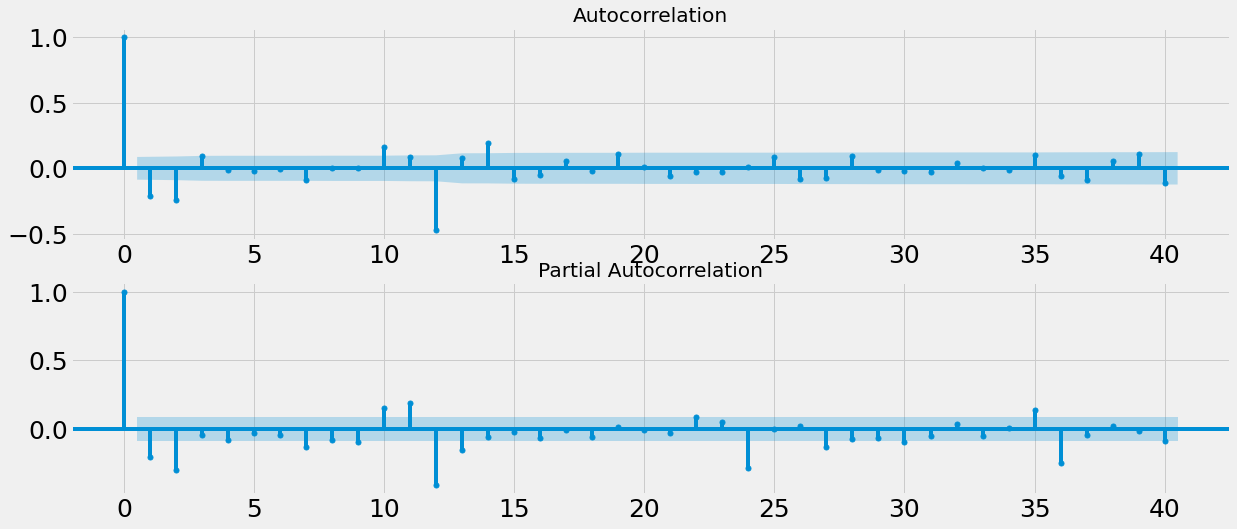

In [52]:
fig = plt.figure(figsize=(18.5,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

# 6.2 Grid search

Encontrar os parâmetros ótimos para modelos ARIMA usando o método gráfico não é trivial e é demorado. Vamos selecionar os valores dos parâmetros ótimos sistematicamente usando o método de busca em grade (otimização de hiperparâmetros). A pesquisa em grade explora iterativamente diferentes combinações dos parâmetros. Para cada combinação de parâmetros, ajustaremos um novo modelo ARIMA sazonal com a função SARIMAX() do módulo statsmodels e avaliaremos sua qualidade geral. Uma vez que tenhamos explorado todo o cenário de parâmetros, nosso conjunto ótimo de parâmetros será aquele que produzirá o melhor desempenho para nossos critérios de interesse.

Nota: intervalos maiores de parâmetros p, d, q resultam em tempo de busca exponencialmente maior. Se você tentar mais de 2, esteja preparado para esperar. Encontrei melhores resultados de AIC com maior faixa de valor, mas o modelo final é essencialmente o mesmo.

Vamos começar gerando as várias combinações de parâmetros que desejamos avaliar:

In [53]:
import itertools

# Defina os parâmetros p, d e q para tomar qualquer valor entre 0 e 2
p = d = q = range(0, 2)

# Gera todas as combinações diferentes de trigêmeos p, q e q
pdq = list(itertools.product(p, d, q))

# Gerar todas as diferentes combinações de trigêmeos sazonais p, q e q
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

print('Exemplos de combinações de parâmetros Sazonal ARIMA para Sazonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Exemplos de combinações de parâmetros Sazonal ARIMA para Sazonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


Ao avaliar e comparar modelos estatísticos ajustados com parâmetros diferentes, cada um pode ser classificado em relação ao outro com base em quão bem ele se ajusta aos dados ou em sua capacidade de prever com precisão pontos de dados futuros. Usaremos o valor AIC (Akaike Information Criterion), que é convenientemente retornado com modelos ARIMA ajustados usando statsmodels. O AIC mede quão bem um modelo se ajusta aos dados, levando em consideração a complexidade geral do modelo. Um modelo que se ajusta muito bem aos dados ao usar muitos recursos receberá uma pontuação AIC maior do que um modelo que usa menos recursos para obter a mesma qualidade de ajuste. Portanto, estamos interessados em encontrar o modelo que produz o menor valor de AIC.

O argumento order especifica os parâmetros (p, d, q), enquanto o argumento season_order especifica o componente sazonal (P, D, Q, S) do modelo Seasonal ARIMA. Após ajustar cada modelo SARIMAX(), o código imprime sua respectiva pontuação AIC.

In [56]:
aic_results = []

for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            if results.mle_retvals is not None and results.mle_retvals['converged'] == False:
                print(results.mle_retvals)
            aic_results.append(results.aic)
        except:
            continue
aic_results.sort()

#print('Best AIC found: ', aic_results[0])

Dependendo da sua plataforma e versão do statsmodel, algumas chamadas fit() podem não convergir.

SARIMAX(1, 1, 1)x(0, 1, 1, 12) produz o valor AIC mais baixo de 2003,553. Portanto, consideraremos esta como a opção ideal de todas as combinações de parâmetros. Identificamos o conjunto de parâmetros que produz o melhor modelo de ajuste para nossos dados de série temporal. Podemos continuar a analisar esse modelo específico com mais profundidade.

In [57]:
mod = sm.tsa.statespace.SARIMAX(data, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Tue, 15 Mar 2022   AIC                           2003.553
Time:                                                     20:27:12   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

A coluna coef mostra o peso (ou seja, importância) de cada recurso e como cada um afeta a série temporal. O P>|z| coluna nos informa sobre o significado de cada peso de recurso. Aqui, cada peso tem um valor de p próximo a 0, então é razoável incluir os recursos em nosso modelo.

Ao ajustar modelos ARIMA sazonais, é importante executar o diagnóstico do modelo para garantir que nenhuma das suposições feitas pelo modelo foi violada. Primeiro, obtemos um gráfico de linha dos erros residuais, sugerindo que ainda pode haver algumas informações de tendência não capturadas pelo modelo.

<AxesSubplot:xlabel='YYYYMM'>

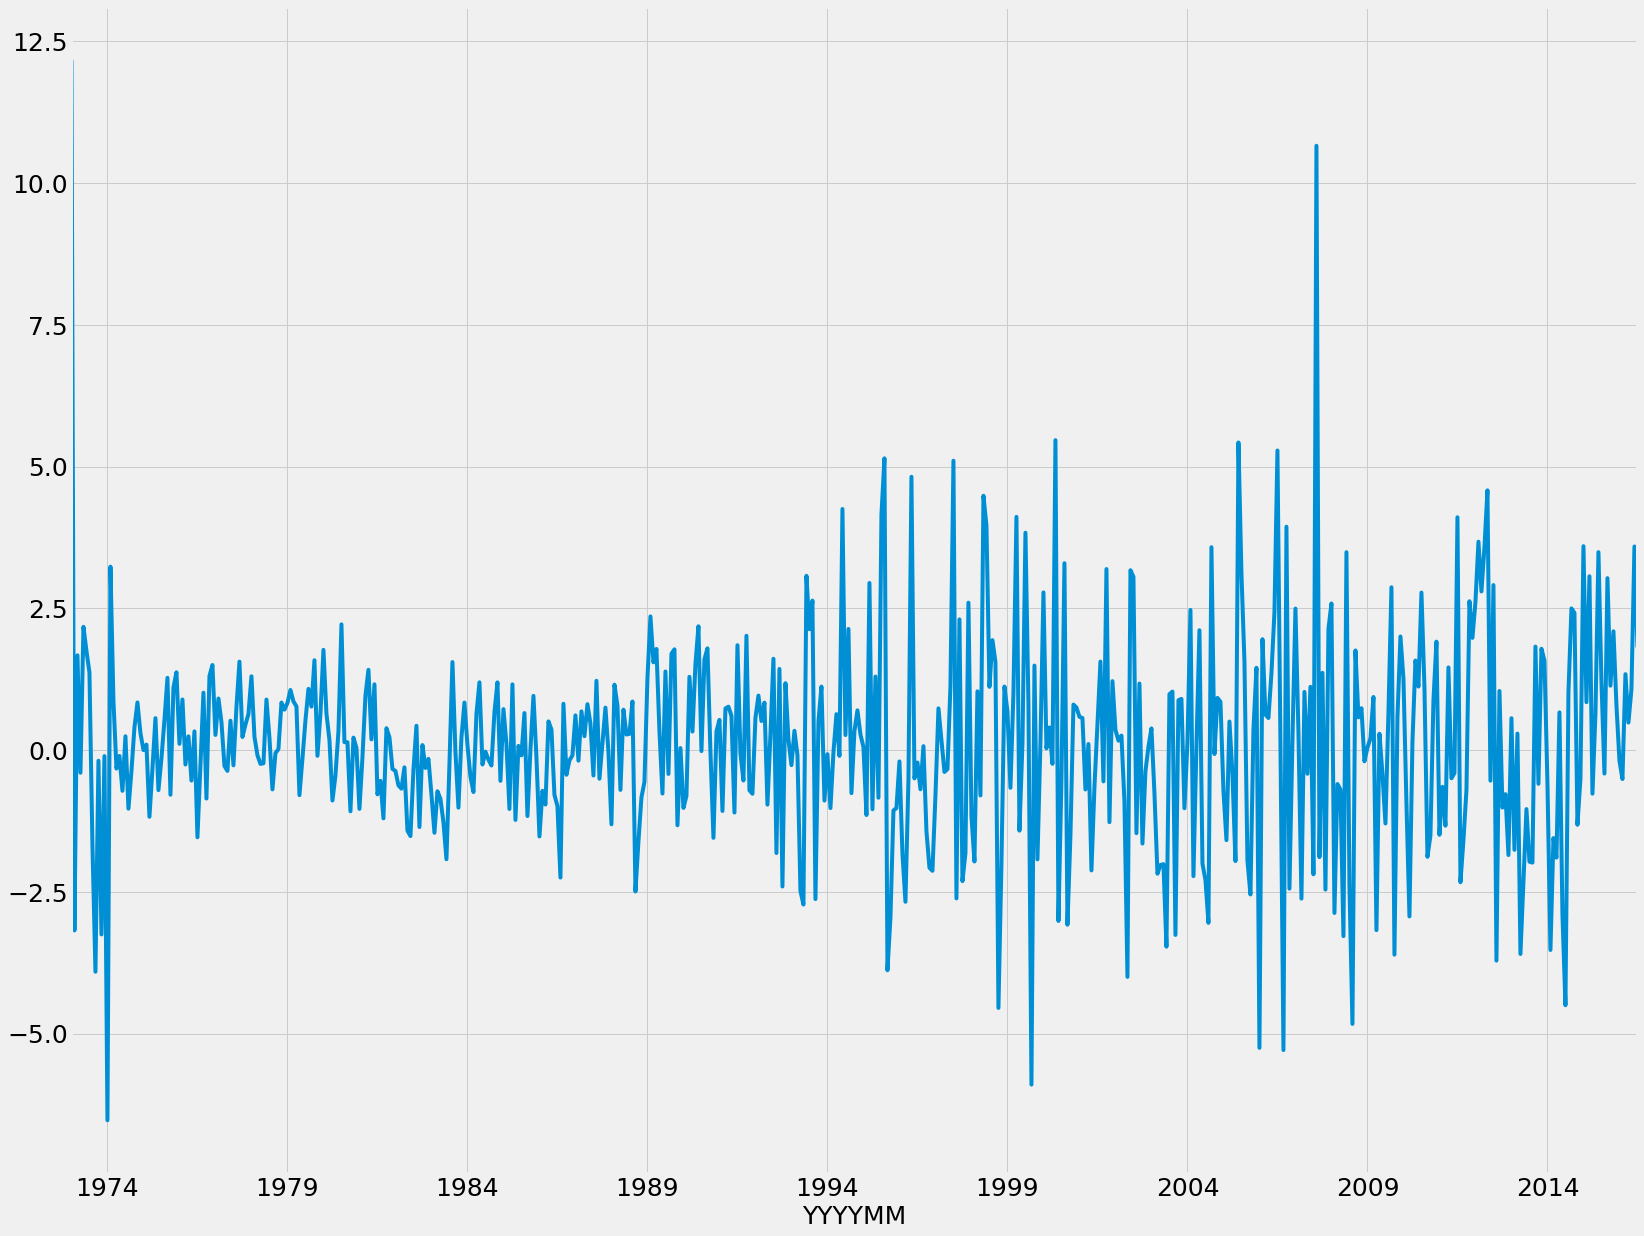

In [58]:
results.resid.plot()

In [59]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528426
25%       -0.791260
50%        0.126975
75%        1.040650
max       12.175000
dtype: float64


A figura mostra a distribuição dos erros residuais. Isso mostra um pouco de viés na previsão. Em seguida, obtemos um gráfico de densidade dos valores de erro residual, sugerindo que os erros são gaussianos, mas podem não estar centrados em zero.

<AxesSubplot:ylabel='Density'>

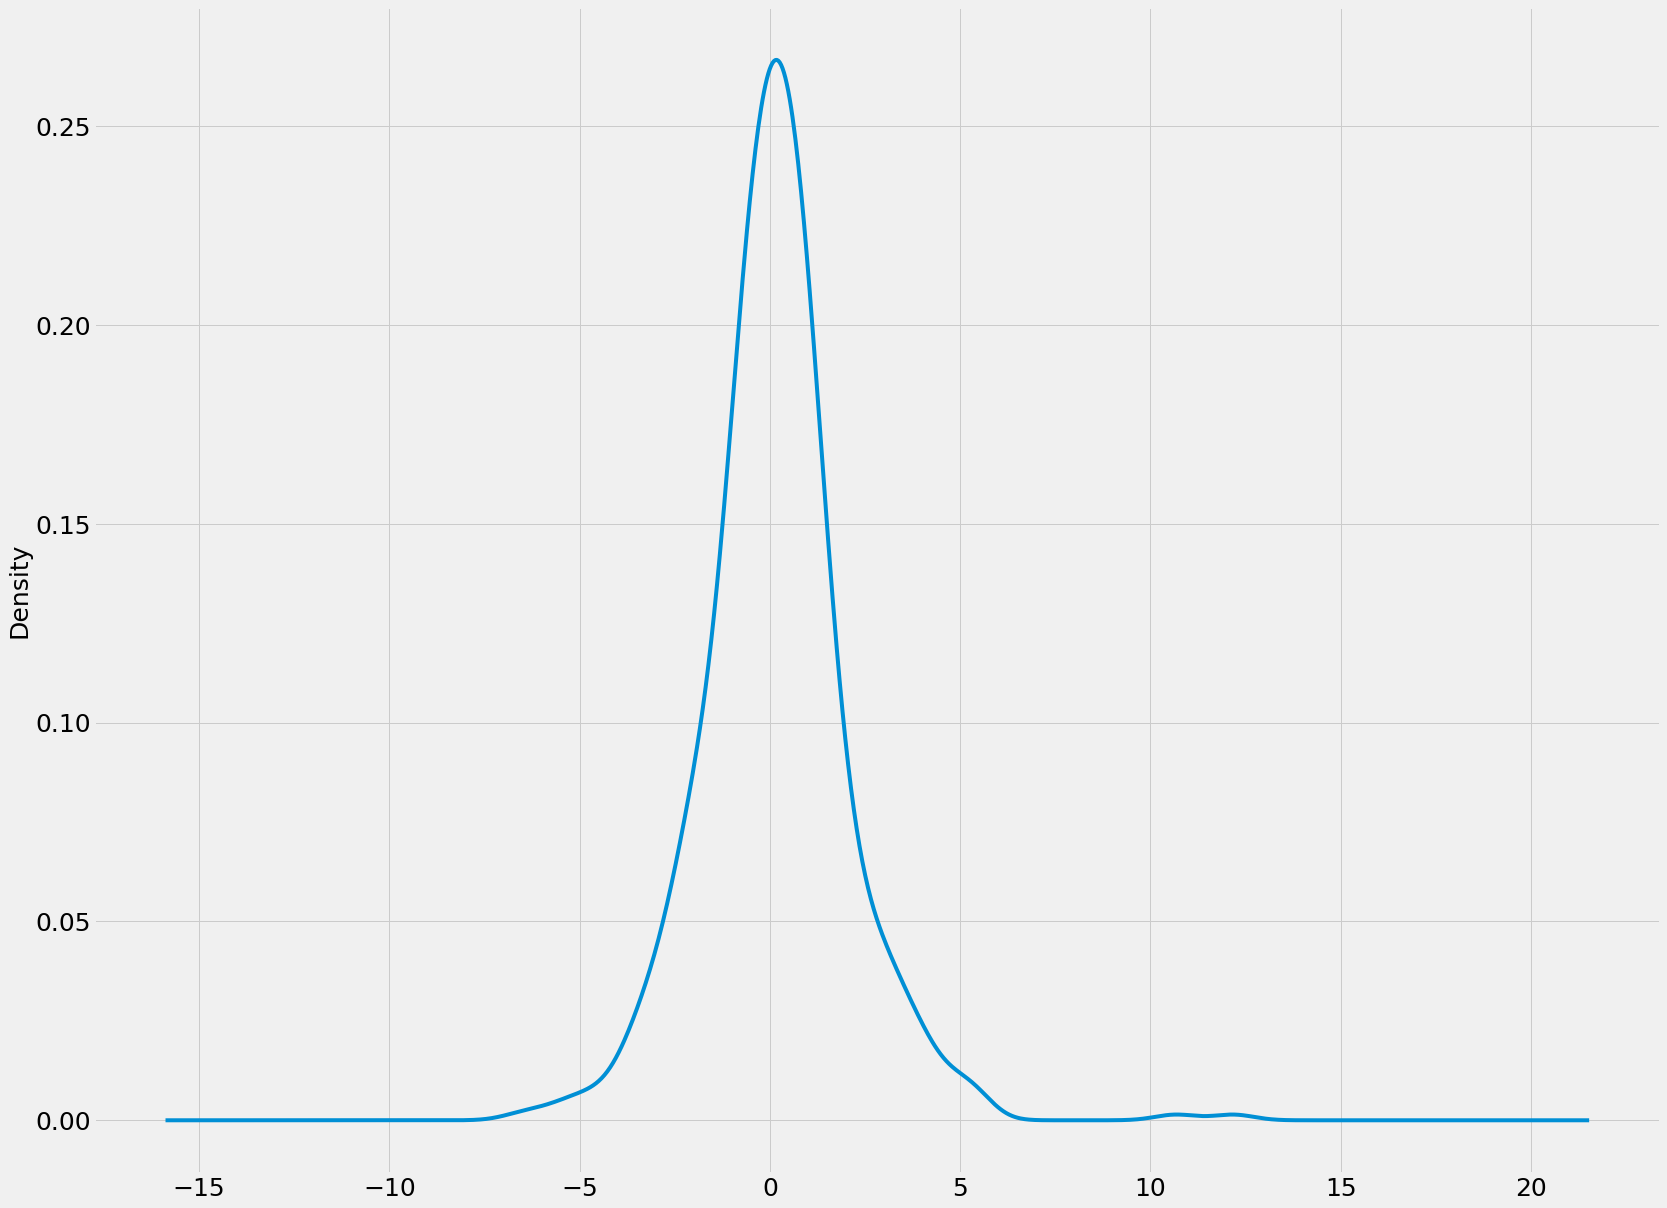

In [60]:
results.resid.plot(kind='kde')

O objeto plot_diagnostics nos permite gerar diagnósticos de modelo rapidamente e investigar qualquer comportamento incomum.

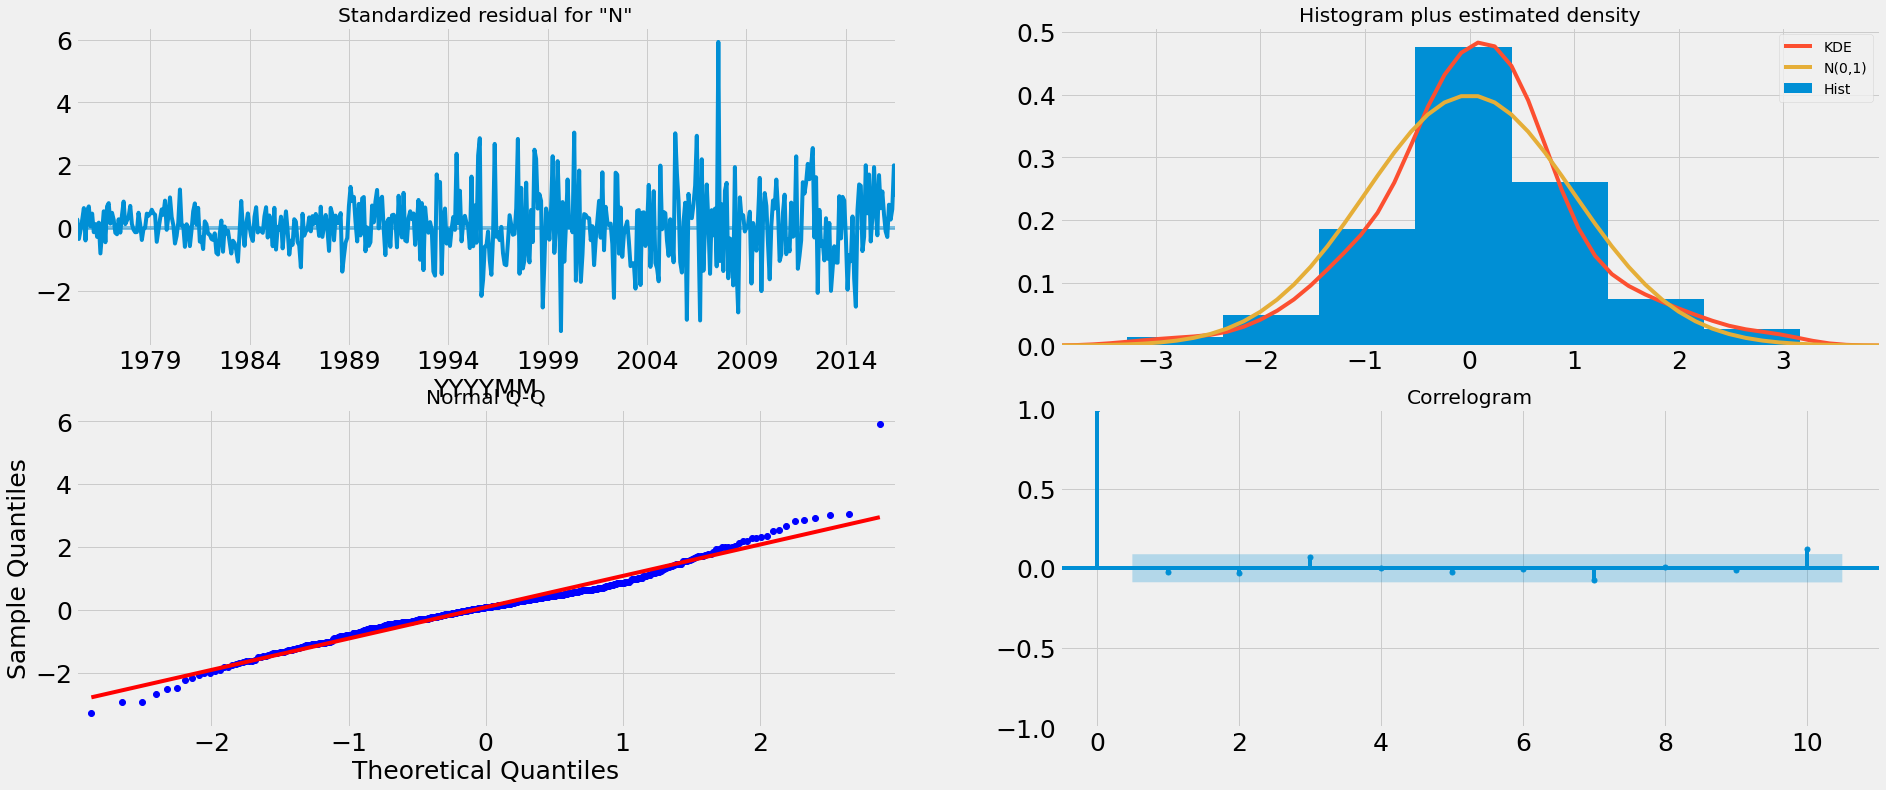

In [61]:
results.plot_diagnostics(figsize=(28.8, 12))
plt.show()

Nossa principal preocupação é garantir que os resíduos do nosso modelo sejam não correlacionados e normalmente distribuídos com média zero. Se o modelo sazonal ARIMA não satisfizer essas propriedades, é uma boa indicação de que pode ser melhorado ainda mais.

O diagnóstico do modelo sugere que o resíduo do modelo é normalmente distribuído com base no seguinte:

- No gráfico superior direito, a linha vermelha do KDE segue de perto com a linha N(0,1). Onde, N(0,1) é a notação padrão para uma distribuição normal com média 0 e desvio padrão de 1. Esta é uma boa indicação de que os resíduos são normalmente distribuídos. Os erros de previsão se desviam um pouco da linha reta, indicando que a distribuição normal não é um modelo perfeito para a distribuição de erros de previsão, mas não é irracional.

- O gráfico qq no canto inferior esquerdo mostra que a distribuição ordenada dos resíduos (pontos azuis) segue a tendência linear das amostras retiradas de uma distribuição normal padrão. Novamente, esta é uma forte indicação de que os resíduos são normalmente distribuídos.

- Os resíduos ao longo do tempo (gráfico superior esquerdo) não exibem nenhuma sazonalidade óbvia e parecem ser ruído branco. Isso é confirmado pelo gráfico de autocorrelação (ou seja, correlograma) no canto inferior direito, que mostra que os resíduos da série temporal têm baixa correlação com versões defasadas de si mesmo.

Essas observações nos levam a concluir que nosso modelo produz um ajuste satisfatório que pode nos ajudar a entender nossos dados de séries temporais e prever valores futuros.

# 7) Validando a previsão

Obtivemos um modelo para nossa série temporal que agora pode ser usado para produzir previsões. Começamos comparando os valores previstos com os valores reais da série temporal, o que nos ajudará a entender a precisão de nossa previsão. Os atributos get_prediction() e conf_int() permitem obter os valores e intervalos de confiança associados para previsões da série temporal.

In [62]:
pred = results.get_prediction(start = 480, end = 522, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  upper Natural Gas Electric Power Sector CO2 Emissions
YYYYMM                                                                                                                  
2013-01-31                                          30.203836                                              37.257325    
2013-02-28                                          29.088381                                              36.141870    
2013-03-31                                          28.958986                                              36.012475    
2013-04-30                                          30.708074                                              37.761564    
2013-05-31                                          32.104080                                              39.157570

O argumento dynamic=False garante que produzamos previsões um passo à frente, o que significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto.

Podemos traçar os valores reais e previstos da série temporal de emissões de CO2 para avaliar o quão bem o modelo se ajusta.

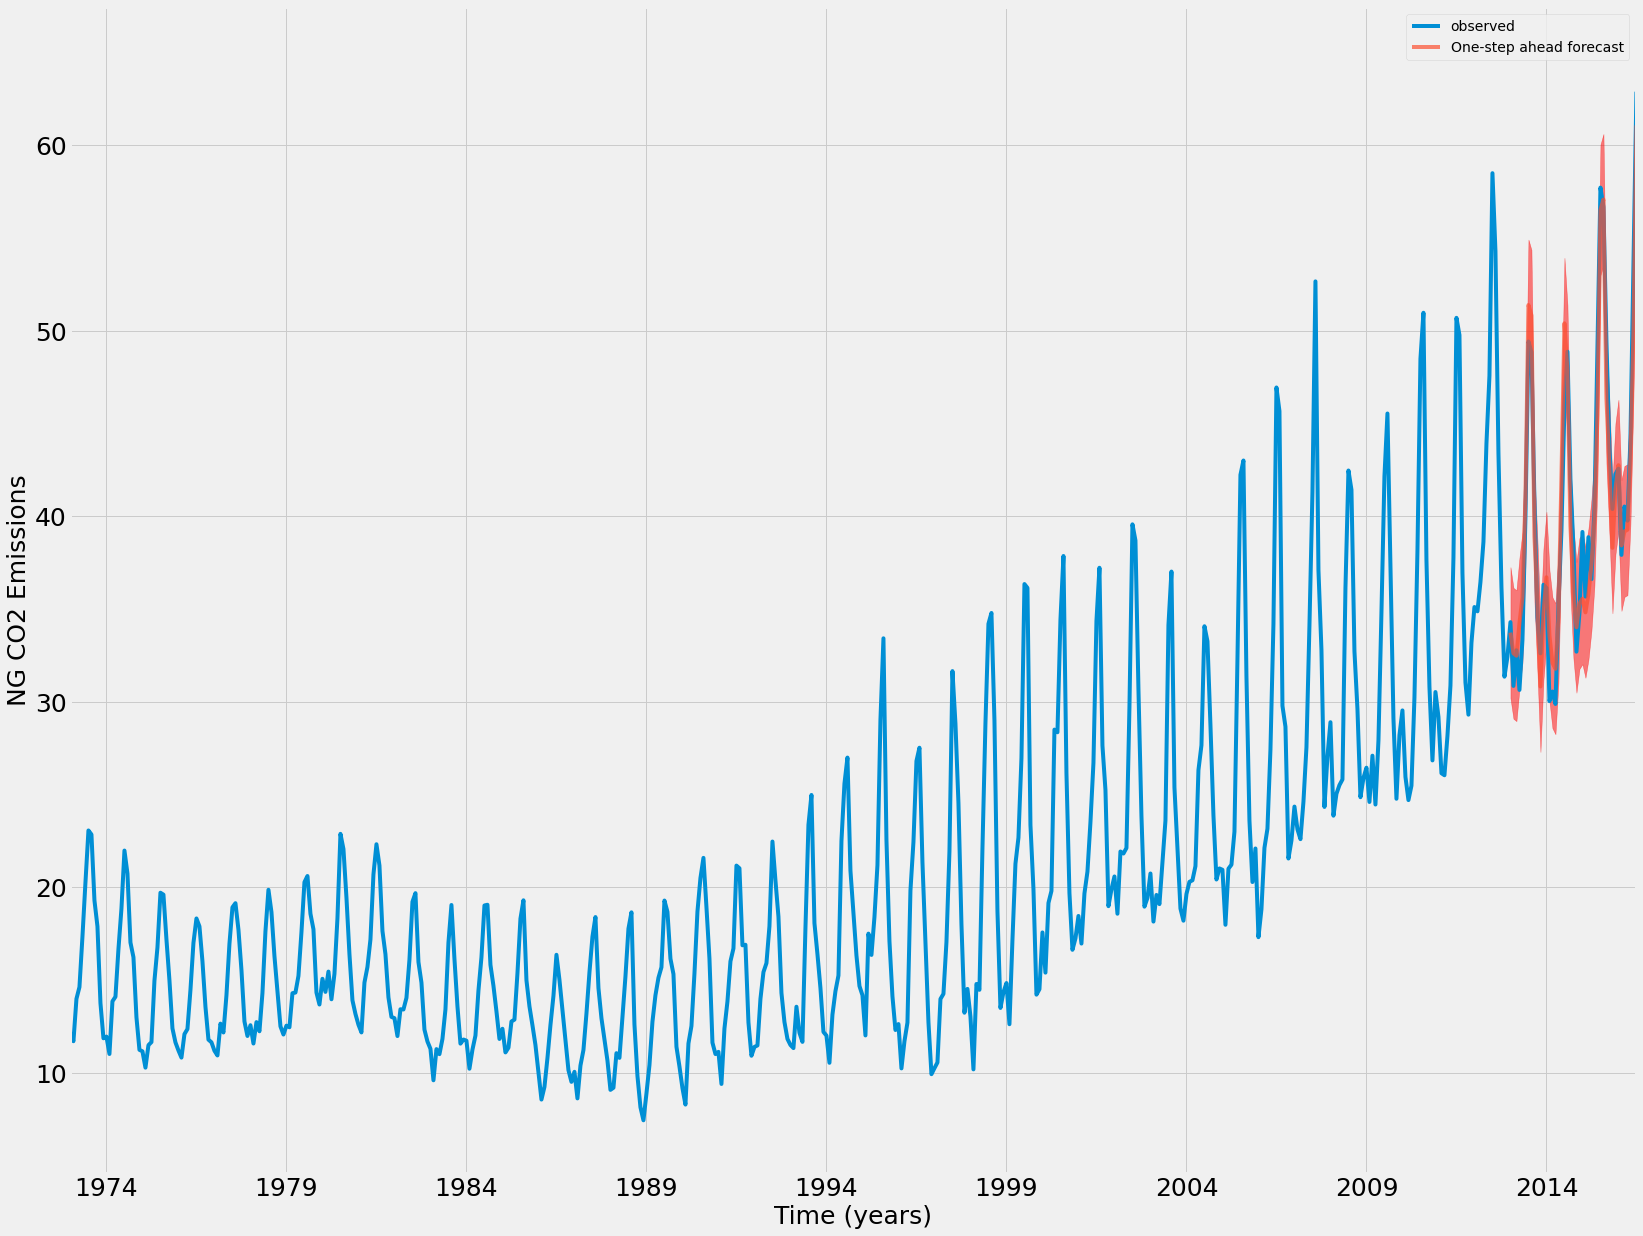

In [63]:
ax = data['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

No geral, nossas previsões se alinham muito bem com os valores reais, mostrando um comportamento geral semelhante.

Também é útil quantificar a precisão de nossas previsões. Usaremos o MSE (Mean Squared Error), que resume o erro médio de nossas previsões. Para cada valor previsto, calculamos sua distância até o valor verdadeiro e elevamos o resultado ao quadrado. Os resultados precisam ser elevados ao quadrado para que as diferenças positivas/negativas não se anulem.

In [64]:
mte_forecast = pred.predicted_mean
mte_truth = data['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forecast: 2.0236


In [65]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

O objetivo de desenvolver o modelo é obter um poder preditivo de boa qualidade usando a previsão dinâmica. Ou seja, usamos as informações da série temporal até um determinado ponto, e depois disso, as previsões são geradas usando valores de pontos temporais previstos anteriores da seguinte forma:

In [66]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

A partir da plotagem dos valores observados e previstos da série temporal, vemos que as previsões gerais são precisas mesmo quando usamos a previsão dinâmica. Todos os valores previstos (linha vermelha) correspondem de perto aos dados observados originais (linha azul) e estão bem dentro dos intervalos de confiança de nossa previsão.

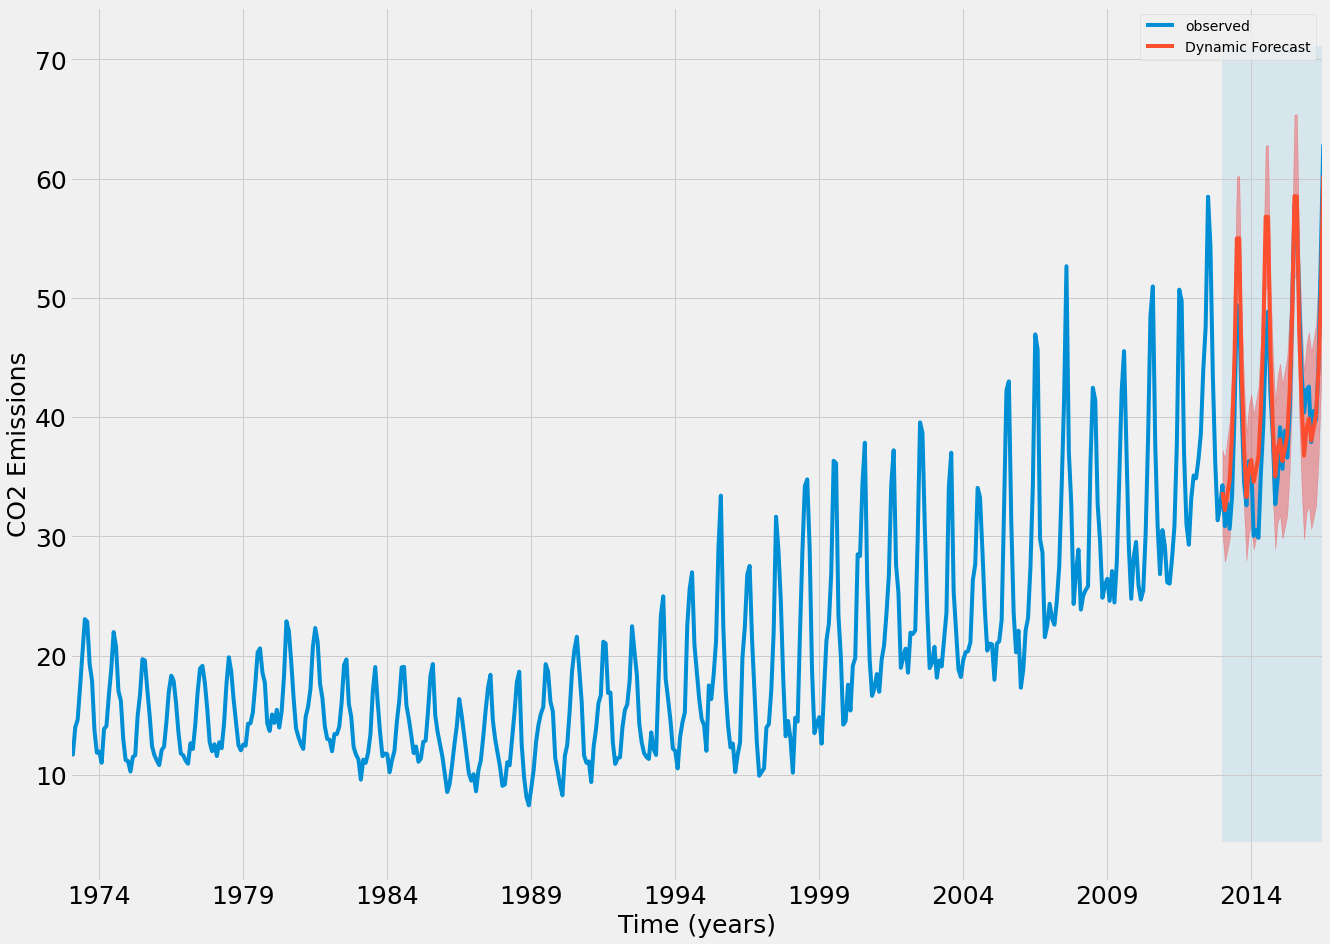

In [67]:
ax = data['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [68]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_original = data['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_original) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_original)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forecast: 3.7936


# 8) Previsão

Podemos usar a saída desse código para traçar a série temporal e as previsões de seus valores futuros.

In [69]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31                                          58.062559                                              65.116049    
2016-09-30                                          47.316615                                              55.987495    
2016-10-31                                          40.736072                                              50.163095    
2016-11-30                                          36.175924                                              46.010288    
2016-12-31                                          38.095112                                              48.172699

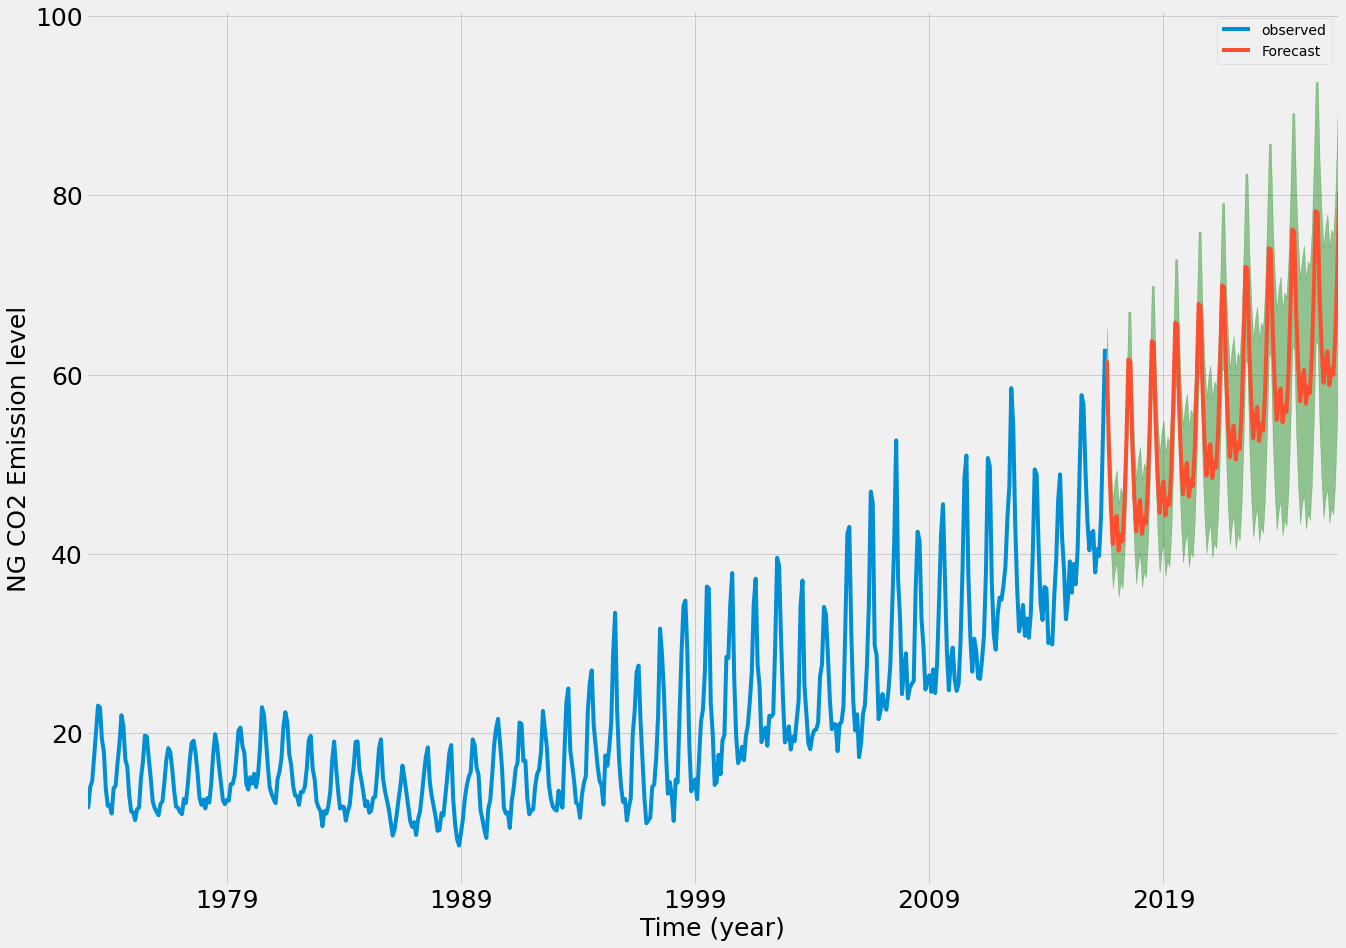

In [70]:
ax = data.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

Tanto a previsão quanto o intervalo de confiança associado que geramos agora podem ser usados para explorar e entender melhor a série temporal. A previsão mostra que a emissão de CO2 da geração de energia a gás natural deverá continuar aumentando.

# 9) Conclusão

Neste caderno, explorei como recuperar o conjunto de dados CSV, como transformar o conjunto de dados em séries temporais, testando se a série temporal é estacionária ou não usando métodos estatísticos de teste gráficos e Dickey-Fuller, como transformar séries temporais em estacionárias, como encontrar os parâmetros ideais para construir o modelo SARIMA usando o método de pesquisa de grade, diagnosticar a previsão de séries temporais, validar a potência preditiva, prever a emissão futura de CO2 de 10 anos da geração de energia usando gás natural.

Trabalho futuro: desenvolvimento de um modelo de séries temporais de previsão de gás natural

Sugestões, comentários e perguntas são bem-vindos!